# <h1><center>IOD Capstone Project</center></h1>
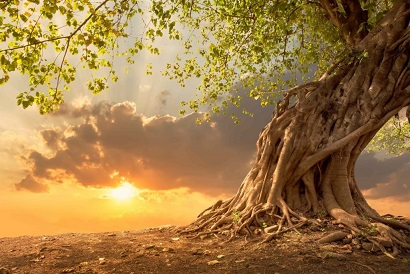
## <center>Investigating treatment effectiveness in a holistic psychology practice</center>
###   <br><sup><center> By Geoff Lyons</center></sup>
<b> Background </b>  
Inspirit Psychology is a private psychology and wellness practice in Sydney. The practice targets the holistic suculture by integrating regular evidence-based counselling interventions with emerging complementary therapies, such as yoga, hypnotherapy and energy medicine (an umbrella term for interventions that propose to enhance wellness through the manipulation of the bodies bioenergy field. Examples include 'reiki' and 'sound healing').   

Registered health practitioners must provide evidence-based interventions. The most common for psychologists is a form of counselling called 'cognitive-behavioural therapy' where the therapist and client spend a lot of time identifying and reshaping the thoughts and behaviours the client may have that are perpetuating their problem. E.g. a person with a phobia will be gradually exposed to that phobia while trained in helpful thinking that strengthens resolve.

The complementary therapies used at Inspirit Psychology are not yet classified as evidence-based interventions. Psychologists must therefore have a clear justification for using them and, ideally, be researching their effectiveness. By doing this the professional is still applying the principles of evidence-based practice by having theoretical rationale with demonstratable evidence. In short, if a psychologist applies fringe therapies without clear justification and outcome monitoring they are acting unethically and open to scrutiny and disciplinary action from their regulatory body. However, if they research what they are doing they are operating as a true behavioural scientist by applying the principles of evidence-based practice to their work. Unfortunately, the reality is that few psychology practices have the time or expertise to conduct thorough evaluations of their practice. Evidence mostly consists of individual case summaries in the form of letters to GPs and other referrers. Therefore this project is quite unique in that it brings data-driven decision making to psychology.    

The business questions below are essential in ensuring the security and longevity of the business. 

<b> Business questions</b>   
1) In general, are the interventions being used in the practice having a positive effect on client's wellness?   
2) How effective are the complementary therapies being used?   
3) Can we identify those who will respond well to their psychology treatment?   

<b> Data questions </b>   
1) Do clients levels of psychological distress - as indicated by stress, anxiety and depression - change over time in treatment?   
2) Does energy medicine (EM) intervention have a significant effect on client's levels of state relaxation and distress ("state" refers to emotional status in the moment as opposed to "mood" which refers to emotional temperament over a more prolonged period of time such as hours, days or weeks)?   
3) Can we use classification models to predict clients who will respond well to treatment?   

<b> Data sources </b>   
Data was obtained from a range of sources:   

The practice CRM (PowerDiary)   
* Name (string)   
* ID (string)      
* Age (numeric)
* Suburb (categorical)     
* Referral source (categorical)      
* Type of client (standard or complementary [i.e. wants complementary interventions in their treatment])(categorical)      
* Appointment dates (string)   

Clinician notes (recorded within CRM clinical notes or on csv file as a routine part of care)   
* Diagnosis (categorical)   
* Appointment dates  (string)   
* DASS21 outcome scores (numerical)
    * Depression ( 0 to 42)
    * Anxiety ( 0 to 42)
    * Stress ( 0 to 42)
* Clinician rating of therapeutic relationship (categorical)
    * 0 = adequate relationship
    * 1 = strong relationship
* Clinician rating of client progression (binary 0,1)     
    * 0 = progressing adequately
    * 1 = progressing well

Energy healing outcome data (recorded on csv file as a routine part of experimental EM intervention)
* Appointment dates   (string) 
* Client self-rated pre-post EM intervention distress stress level (numerical 0 to 10 scale)   
* Client self-rated pre-post EM intervention and relaxation level (numerical 0 to 10 scale)   

#### Analytical Outline   
1) Exploratory Data Analysis   
2) Calculating days in treatment   
3) Calculating number of sessions per month   
4) Changes in psychological distress over time   
5) Effect sizes over time in treatment   
6) Changes in psychological distress from baseline to 1 month in treatment   
7) Effect of energy medicine on state stress and relaxation   
8) Predicting response to treatment using supervised learning models   
9) Predicting energy medicine clients using supervised learning models   
10) Conclusion and future directions   


# Part 1. Exploratory Data Analysis: Demographics and clinical features   
This section explores the client demographics and clinical characteristics such as diagnosis

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from scipy import stats
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [62]:
clients = pd.read_csv('inspirit_df_clean.csv')

In [63]:
clients.head()

,ID,Healing,Type,Age,Gender,Suburb,Source,Diagnosis,Number_appointments,Cancel_freq,No_show_freq
0,729,0,Complementary,NaN,1,ENGADINE,Internet,Nil,2,0,0
1,755,0,Standard,NaN,0,CAMERA PARK,Word of mouth,Nil,2,0,0
2,726,0,Complementary,NaN,0,CRONULLA,Internet,Personality disorder,2,2,1
3,890,0,Standard,NaN,0,CARNIGBAH SOUTH,Internet,Personality disorder,4,1,0
4,669,1,Complementary,NaN,0,WORONORA HEIGHTS,Internet,Anxiety,6,2,0


In [64]:
# Changing the names of the columns and inspecting the dataframe
clients.columns = ['ID', 'Healing', 'Type', 'Age', 'Gender','Suburb','Source','Diagnosis','Appointments', 'Cancellations','No shows']
print(clients.dtypes)
clients.head()

ID                 int64
Healing            int64
Type              object
Age              float64
Gender             int64
Suburb            object
Source            object
Diagnosis         object
Appointments       int64
Cancellations      int64
No shows           int64
dtype: object


,ID,Healing,Type,Age,Gender,Suburb,Source,Diagnosis,Appointments,Cancellations,No shows
0,729,0,Complementary,NaN,1,ENGADINE,Internet,Nil,2,0,0
1,755,0,Standard,NaN,0,CAMERA PARK,Word of mouth,Nil,2,0,0
2,726,0,Complementary,NaN,0,CRONULLA,Internet,Personality disorder,2,2,1
3,890,0,Standard,NaN,0,CARNIGBAH SOUTH,Internet,Personality disorder,4,1,0
4,669,1,Complementary,NaN,0,WORONORA HEIGHTS,Internet,Anxiety,6,2,0


In [65]:
# Checking for duplications
clients[clients.duplicated()]

,ID,Healing,Type,Age,Gender,Suburb,Source,Diagnosis,Appointments,Cancellations,No shows


In [66]:
# Checking for missing data
clients.isnull().sum()

ID                0
Healing           0
Type              0
Age              58
Gender            0
Suburb            0
Source            0
Diagnosis         0
Appointments      0
Cancellations     0
No shows          0
dtype: int64

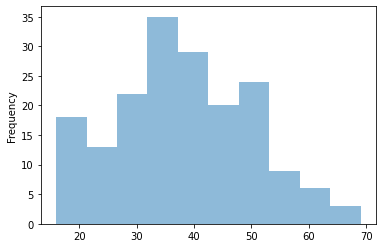

In [67]:
# Looking for outliers before replacing the missing ages
clients['Age'].plot.hist(alpha=0.5)

In [68]:
# Checking to see if there is a difference between mean age and median age. There is not. Either can be used for missing values.
clients.Age.mean()

38.07821229050279

In [69]:
clients.Age.median()

38.0

In [70]:
# Replacing missing values with the mean of Age
clients.Age = clients.Age.fillna(clients.Age.mean())

In [71]:
clients.isnull().sum()

ID               0
Healing          0
Type             0
Age              0
Gender           0
Suburb           0
Source           0
Diagnosis        0
Appointments     0
Cancellations    0
No shows         0
dtype: int64

In [72]:
# Descriptives are explored. This provides much of the information needed for the Project's presentation and powerpoint.
clients.describe().round(2)

,ID,Healing,Age,Gender,Appointments,Cancellations,No shows
count,237.00,237.00,237.00,237.00,237.00,237.00,237.00
mean,734.28,0.24,38.08,0.47,4.35,0.85,0.19
std,205.58,0.43,10.18,0.50,4.58,1.07,0.59
min,6.00,0.00,16.00,0.00,0.00,0.00,0.00
25%,686.00,0.00,33.00,0.00,1.00,0.00,0.00
50%,791.00,0.00,38.08,0.00,3.00,1.00,0.00
75%,872.00,0.00,44.00,1.00,6.00,1.00,0.00
max,948.00,1.00,69.00,1.00,27.00,6.00,5.00


In [73]:
#Change type to object because most variables are categorical
clients.ID = clients.ID.astype(object)
clients.Healing = clients.Healing.astype(object)
clients.Gender = clients.Gender.astype(object)

In [74]:
# In this dataset there are 237 rows and 11 columns
clients.shape

(237, 11)

In [ ]:
#Saving the file for use in PowerBI - this will be useful in the future.
clients.to_csv(r'inspirit_df_clean_powerBI.csv', index = False)

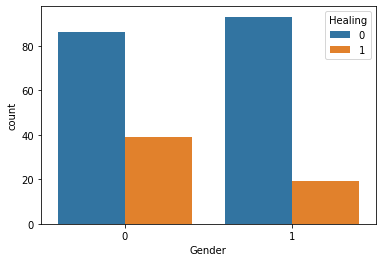

In [75]:
# Exploring the gender split across those receiving healing and those who did not.
sns.countplot(data=clients,x='Gender',hue='Healing')

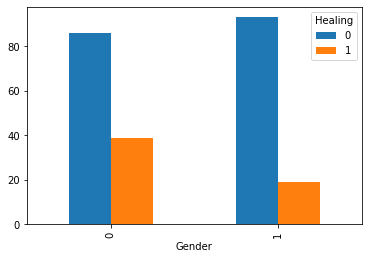

In [76]:
# Same as a bove but jsut a different way of doing it.
clients.groupby(['Gender','Healing'])['Gender'].count().unstack('Healing').plot.bar()

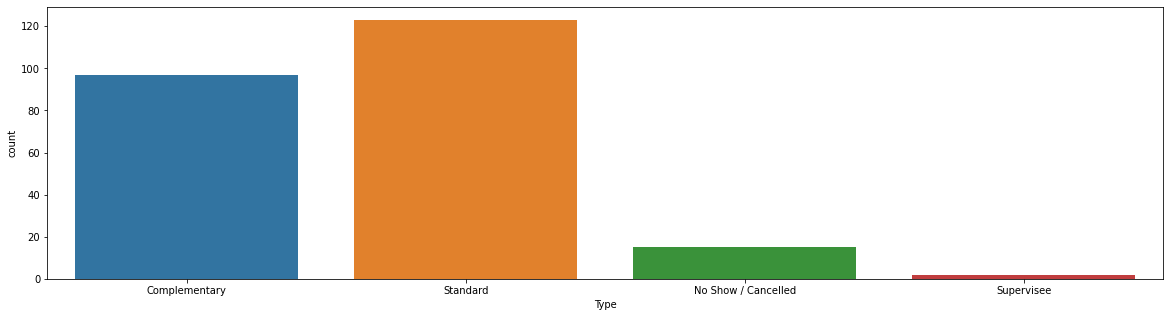

In [78]:
# The majority of clients are "standard" - they just want normal counselling - but nearly as many are "complementary" - they are open to trying complementary wellness interventions like meditation.
plt.figure(figsize = (20,5))
sns.countplot(data=clients,x='Type')

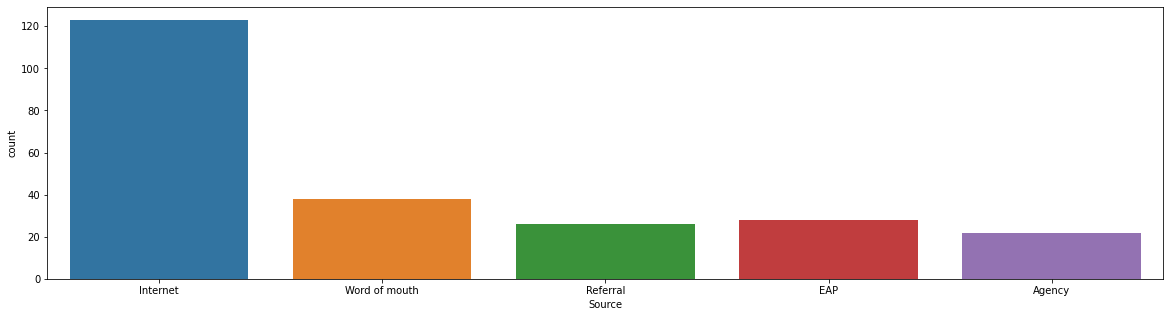

In [79]:
# Most clients come via the internet
plt.figure(figsize = (20,5))
sns.countplot(data=clients,x='Source')

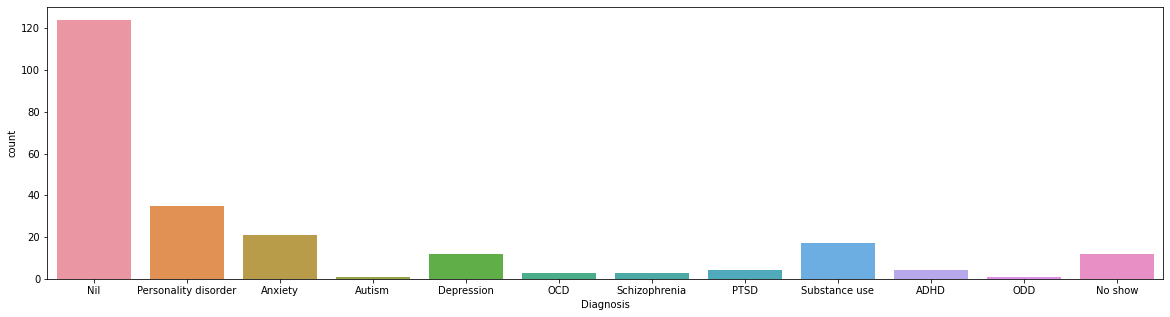

In [80]:
#Most clients actually do not meet criteria for a mental health disorder. They are just stressed and wanting some support.
plt.figure(figsize = (20,5))
sns.countplot(data=clients,x='Diagnosis')

In [81]:
#This is for determining the percentage of gender for clients who did and did not experience any complementary therapy (aka "Energy Medicine")
Total_Gender = clients['Gender'].count()
males = clients.Gender[clients.Gender == 1]
male_count = males.count()
Percentage_male = male_count*100/Total_Gender
females = clients.Gender[clients.Gender == 0]
female_count = females.count()
Percentage_female = female_count*100/Total_Gender
Healing_clients = clients[clients.Healing == 1]
Total_Gender_Energy = Healing_clients['Gender'].count()
males_energy = Healing_clients.Gender[Healing_clients.Gender == 1]
male_energy_count = males_energy.count()
Percentage_male_energy = male_energy_count*100/Total_Gender_Energy

females_energy = Healing_clients.Gender[Healing_clients.Gender == 0]
female_energy_count = females_energy.count()
Percentage_female_energy = female_energy_count*100/Total_Gender_Energy
Percentage_female_energy.round(2).astype(str) + '%'

print('Standard Clients')
print('-----------------')
print('Percentage of females = '+str(Percentage_female.round(2))+ '%')
print('Percentage of males = '+str(Percentage_male.round(2))+ '%')
print()
print('Energy Medicine Clients')
print('-----------------------')
print('Percentage of females = '+str(Percentage_female_energy.round(2))+ '%')
print('Percentage of males = '+str(Percentage_male_energy.round(2))+ '%')

Standard Clients
-----------------
Percentage of females = 52.74%
Percentage of males = 47.26%

Energy Medicine Clients
-----------------------
Percentage of females = 67.24%
Percentage of males = 32.76%


In [82]:
#percentage of diagnoses 'Nil'
Total_Diagnosis = clients['Diagnosis'].count()
Nil = clients.Diagnosis[clients.Diagnosis == 'Nil']
Nil_count = Nil.count()
Percentage_Nil = Nil_count*100/Total_Diagnosis
print('Percentage with no diagnosis = '+str(Percentage_Nil.round(2))+ '%')

#percentage of diagnoses 'Personality disorder'
Personality_disorder = clients.Diagnosis[clients.Diagnosis == 'Personality disorder']
Personality_disorder_count = Personality_disorder.count()
Percentage_Personality_disorder = Personality_disorder_count*100/Total_Diagnosis
print('Percentage with a personality disorder = '+str(Percentage_Personality_disorder.round(2))+ '%')

#percentage of diagnoses 'Anxiety'
Anxiety_disorder = clients.Diagnosis[clients.Diagnosis == 'Anxiety']
Anxiety_count = Anxiety_disorder.count()
Percentage_Anxiety = Anxiety_count*100/Total_Diagnosis
print('Percentage with an anxiety disorder = '+str(Percentage_Anxiety.round(2))+ '%')

#percentage of diagnoses 'Depression'
Depression_disorder = clients.Diagnosis[clients.Diagnosis == 'Depression']
Depression_count = Depression_disorder.count()
Percentage_Depression = Depression_count*100/Total_Diagnosis
print('Percentage with depression = '+str(Percentage_Depression.round(2))+ '%')

#percentage of diagnoses 'Substance use'
Substance_use = clients.Diagnosis[clients.Diagnosis == 'Substance use']
Substance_use_count = Substance_use.count()
Percentage_Substance_use = Substance_use_count*100/Total_Diagnosis
print('Percentage with substance use = '+str(Percentage_Substance_use.round(2))+ '%')

#percentage of diagnoses 'No show'
No_show = clients.Diagnosis[clients.Diagnosis == 'No show']
No_show_count = No_show.count()
Percentage_No_show = No_show_count*100/Total_Diagnosis
print('Percentage of "No Shows" = '+str(Percentage_No_show.round(2))+ '%')

Percentage with no diagnosis = 52.32%
Percentage with a personality disorder = 14.77%
Percentage with an anxiety disorder = 8.86%
Percentage with depression = 5.06%
Percentage with substance use = 7.17%
Percentage of "No Shows" = 5.06%


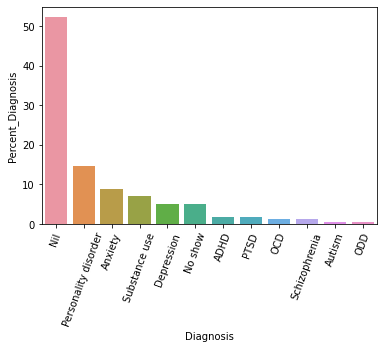

In [84]:
#Percentages of diagnoses
percentage_diagnosis = pd.read_csv('Inspirit_df_clean_diagnosis.csv')
dx_plot = sns.barplot(x='Diagnosis',y ='Percent_Diagnosis', data=percentage_diagnosis)
dx_plot.set_xticklabels(dx_plot.get_xticklabels(), rotation=70);
#ref: https://www.youtube.com/watch?v=fXff4-_3Ey0

## Summary
* 52% of clients do not have a mental health diagnosis. This is good becasue these clients are less resource intensive.
* The most common diagnosis is a personality disorder (15%) followed by anxiety (9%) then substance use (8%).
* The gender split is about 50/50 though closer to 70/30 (67% female) for clients who receive a complementary therapy
* The majority of clients come from the internet
* The split between clients wanting traditional counselling ("standard" clients) and those interested in exploring complementary therapies as well ("complementary" clients) is close to 50/50 but slighlty in favour of standard.


# Part 2. Calculating the days in treatment
The purpose of this code is to determine what clients' treatment period typically looks like in terms of time in treatment and number of sessions received during that period. Also it needs to be determined whether the mean or median is a better representation of client treatment.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline
import seaborn as sns
from datetime import datetime

In [17]:
df = pd.read_csv('session_counts.csv')

In [18]:
df.head()

,ID,Date,Count,Count per month
0,6,30/08/2019,8,1
1,6,13/09/2019,9,2
2,6,20/09/2019,9,2
3,6,4/10/2019,10,2
4,6,18/10/2019,10,2


In [19]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [20]:
gb = df.groupby(['ID'])
df_min_max = gb.agg({'Date' : [np.min, np.max]})df_min_max.to_csv(r'df_min_max.csv')
#Based on this reference: https://stackoverflow.com/questions/25024797/max-and-min-date-in-pandas-groupby

In [22]:
df_min_max.to_csv(r'df_min_max.csv')

In [23]:
df_min_max = pd.read_csv(r'df_min_max.csv')

In [24]:
df_min_max.head()

,ID,amin,amax
0,6,30/08/2019,24/04/2020
1,11,3/04/2020,3/04/2020
2,17,14/08/2019,11/02/2020
3,26,16/08/2019,29/05/2020
4,27,20/06/2020,12/09/2020


In [8]:
df_min_max.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230 entries, 6 to 971
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   (Date, amin)  230 non-null    datetime64[ns]
 1   (Date, amax)  230 non-null    datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 5.4 KB


In [25]:
df_min_max['min'] = pd.to_datetime(df_min_max['amin'], format='%d/%m/%Y')
df_min_max['max'] = pd.to_datetime(df_min_max['amax'], format='%d/%m/%Y')
df_min_max['Difference'] = (df_min_max['max'] - df_min_max['min']).dt.days
df_min_max

#reference: https://stackoverflow.com/questions/37840812/pandas-subtracting-two-date-columns-and-the-result-being-an-integer/37848869

,ID,amin,amax,min,max,Difference
0,6,30/08/2019,24/04/2020,2019-08-30,2020-04-24,238
1,11,3/04/2020,3/04/2020,2020-04-03,2020-04-03,0
2,17,14/08/2019,11/02/2020,2019-08-14,2020-02-11,181
3,26,16/08/2019,29/05/2020,2019-08-16,2020-05-29,287
4,27,20/06/2020,12/09/2020,2020-06-20,2020-09-12,84
...,...,...,...,...,...,...
225,945,5/09/2020,5/09/2020,2020-09-05,2020-09-05,0
226,948,7/09/2020,7/09/2020,2020-09-07,2020-09-07,0
227,951,12/09/2020,12/09/2020,2020-09-12,2020-09-12,0
228,953,4/09/2020,4/09/2020,2020-09-04,2020-09-04,0


In [26]:
#Adding 1 to the column because the zeros should be 1 day in treatment because the measures are taken on their first day.
df_min_max['Difference'] = df_min_max['Difference']+1
df_min_max

,ID,amin,amax,min,max,Difference
0,6,30/08/2019,24/04/2020,2019-08-30,2020-04-24,239
1,11,3/04/2020,3/04/2020,2020-04-03,2020-04-03,1
2,17,14/08/2019,11/02/2020,2019-08-14,2020-02-11,182
3,26,16/08/2019,29/05/2020,2019-08-16,2020-05-29,288
4,27,20/06/2020,12/09/2020,2020-06-20,2020-09-12,85
...,...,...,...,...,...,...
225,945,5/09/2020,5/09/2020,2020-09-05,2020-09-05,1
226,948,7/09/2020,7/09/2020,2020-09-07,2020-09-07,1
227,951,12/09/2020,12/09/2020,2020-09-12,2020-09-12,1
228,953,4/09/2020,4/09/2020,2020-09-04,2020-09-04,1


In [49]:
df_min_max.Difference.describe()

count    230.000000
mean      78.721739
std      105.799105
min        1.000000
25%        8.000000
50%       37.500000
75%       94.250000
max      396.000000
Name: Difference, dtype: float64

In [32]:
df_min_max.Difference.median()

37.5

(array([116.,  48.,  18.,   7.,  12.,   4.,   5.,   2.,   7.,  11.]),
 array([  1. ,  40.5,  80. , 119.5, 159. , 198.5, 238. , 277.5, 317. ,
        356.5, 396. ]),
 <a list of 10 Patch objects>)

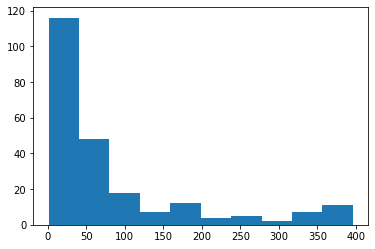

In [33]:
plt.hist(df_min_max['Difference'])

Text(0, 0.5, 'Frequency')

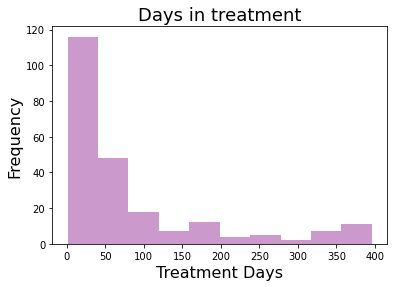

In [47]:
sns.distplot(df_min_max['Difference'], kde=False, color= 'purple', bins=10)
plt.title('Days in treatment', fontsize=18)
plt.xlabel('Treatment Days', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

## Summary
Clients median is the better represenatation of centrality because of the postive skew in the data
* Clients have a  median of 37.5 days in treatment
* Clients have a mean time in treatment of 78 days
* Total range is 1 to 396 days in treatment
* 50% of data - 25 to 75 percentiles - have 8 to 94 days in treatment
* In general I can plan for a client to be in treatment from 1 to 3 months

# Part 3. Identifying the number of sessions per month
Clients stay in treatment for a median of 38 days which is about a month. But how many sessions do they have per month? Some metrics are required to determine this.

In [51]:
# The count and count per month were taken from routine data collection. 
# This code uses the same dataset "df" that was read and used in the proceeding code.
df.head()

,ID,Date,Count,Count per month
0,6,2019-08-30,8,1
1,6,2019-09-13,9,2
2,6,2019-09-20,9,2
3,6,2019-10-04,10,2
4,6,2019-10-18,10,2


In [52]:
#grouping the data by client ID
group = df.groupby('ID')
group.head()

,ID,Date,Count,Count per month
0,6,2019-08-30,8,1
1,6,2019-09-13,9,2
2,6,2019-09-20,9,2
3,6,2019-10-04,10,2
4,6,2019-10-18,10,2
...,...,...,...,...
1018,892,2020-08-20,8,2
1019,618,2019-08-16,8,2
1020,618,2019-08-29,8,2
1021,618,2019-09-26,9,1


In [60]:
#This calculates the average number of sessions per month per client then takes the averages of these averages to give a global average for the dataset
mean_appoint = df.groupby(['ID'])['Count per month'].mean()
mean_of_mean = mean_appoint.mean()
median_appoint = df.groupby(['ID'])['Count per month'].median()
median_of_median = median_appoint.median()

print ("The average number of sessions per month = ", mean_of_mean)
print ("The median number of sessions per month = ", median_of_median)

The average number of sessions per month =  1.6259960203380646
The median number of sessions per month =  2.0


<b>Summary</b>   
Clients were in treatment anywhere from 1 to 396 days, but over half were in treatment for 1 to 94 days, so up to 3 months. The average number of days in treatment was 78 but this is based on a wide distribution of data and less useful than the median which showed 38 days. During this period clients would have an average of 2 sessions per month. This was the same whether looking at the mean or median. So what can be said is that clients generally are in treatment for up to 3 months but usually for 1 month and during that time having 2 sessions per month.

# Part 4. Changes in psychological distress over time
This section is exploring clients response to treatment. The indicators of progression are the subscales of the Depression, Anxiety, Stress Scale. A standardised questionnaire that has three subscales: "depression", "anxiety" and "stress".

In [56]:
#The DASS outcome data was taken from routine data collated in csv format and merged with client ID from the CRM.
df = pd.read_csv('dass.csv',index_col=1,parse_dates=True)

In [87]:
df.head()

,ID,Healing,Stress,Anxiety,Depression,Period,Tx_time,Change_stress,Percent_change_stress,Change_Anx,Percent_change_anx,Change_dep,Percent_change_dep
Date,,,,,,,,,,,,,
2019-11-22,391,1,32,26,32,Baseline,1,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-28,391,1,18,18,24,1 Week,2,-14.0,-43.75,-8.0,-30.77,-8.0,-25.00
2019-06-12,391,1,22,18,16,2 Weeks,3,4.0,22.22,0.0,0.00,-8.0,-33.33
2019-12-23,391,1,18,16,20,1 month,4,-4.0,-18.18,-2.0,-11.11,4.0,25.00
2019-01-23,391,1,16,22,16,2 months,5,-2.0,-11.11,6.0,37.50,-4.0,-20.00


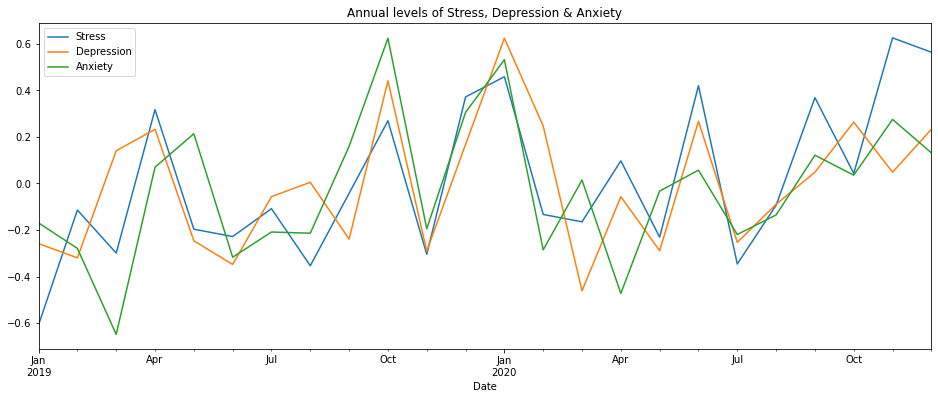

In [57]:
# Here I want to see if there are patterns in the data across the year. For instance maybe the holiday periods are more stressful.
# The data is standardised and then plotted. No clear patterns are present but movement acrsss the three variables is correlated.
from scipy import stats
df['Stress'] = stats.zscore(df.Stress, axis = 0)
df['Depression'] = stats.zscore(df.Depression, axis = 0)
df['Anxiety'] = stats.zscore(df.Anxiety, axis = 0)
df['Stress'].resample('M').mean().plot.line(figsize=(16,6))
df['Depression'].resample('M').mean().plot.line(figsize=(16,6))
df['Anxiety'].resample('M').mean().plot.line(figsize = (16,6), title = 'Annual levels of Stress, Depression & Anxiety')
plt.legend()

<b> Summary </b>   There is no clear patterns in depression, anxiety or stress across calendar months. There is no seasonality in the data. While there are peaks and troughs they do not appear reliably associated with the time of year. So looking at months spent <i>in</i> treatment might be more beneficial than looking at calendar months <i>across</i> treatment.

Text(0, 0.5, 'DASS21 scores')

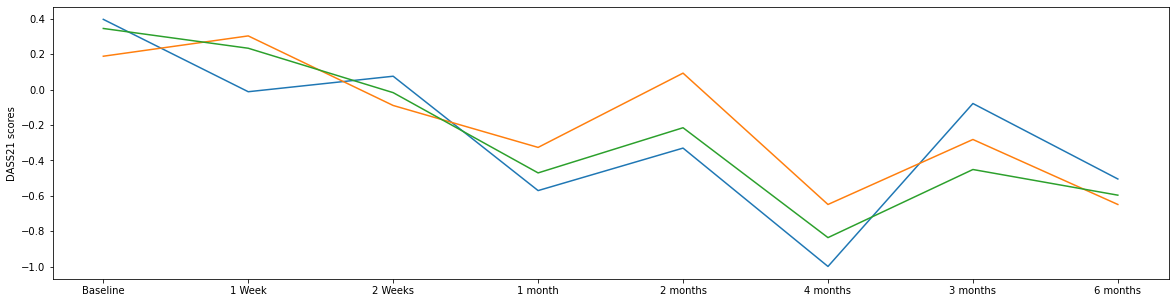

In [62]:
plt.figure(figsize = (20,5))
sns.lineplot(data=df, x='Period',y = 'Stress', err_style = None, sort = False)
sns.lineplot(data=df, x='Period',y = 'Anxiety',err_style = None, sort = False)
sns.lineplot(data=df, x='Period',y = 'Depression',err_style = None, sort = False)
plt.xlabel("")
plt.ylabel("DASS21 scores")

There are no reliable patterns in depression, anxiety and stress across calendar months; however, time in treatment, as represented by weeks and months, does show a reducing trend. What can also be interesting is to explore the effect of treatment on these scores across time through calculation of treatment effect sizes - and this is what is done next.

# Part 5. Effect sizes across time in treatment
Cohen's d is an effect size frequently used in the behavioural sciences for comparing means of two groups. It is something psychologists routinely use to evaluate the effectivenss of their interventions.  

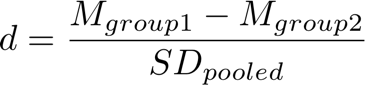


Cohen suggested that d = 0.2 be considered a 'small' effect size, 0.5 represents a 'medium' effect size and 0.8 a 'large' effect size.   

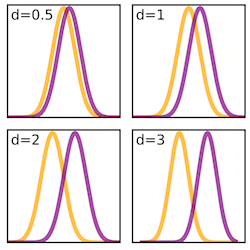

https://www.simplypsychology.org/effect-size.html  
https://rpsychologist.com/d3/cohend/

In [95]:
#Cohen's d values have been calculated as part of routine practice.
cohens = pd.read_excel('dass_cohen_values.xlsx')

In [96]:
cohens.head()

,Treatment_time,Stress,Anxiety,Depression
0,Baseline,0.000000,0.000000,0.000000
1,1 Week,0.717441,0.161806,0.489750
2,2 Week,0.529446,0.529932,0.694601
3,1 Month,1.339998,0.709691,1.192291
4,2 Months,0.466293,0.195105,0.773523


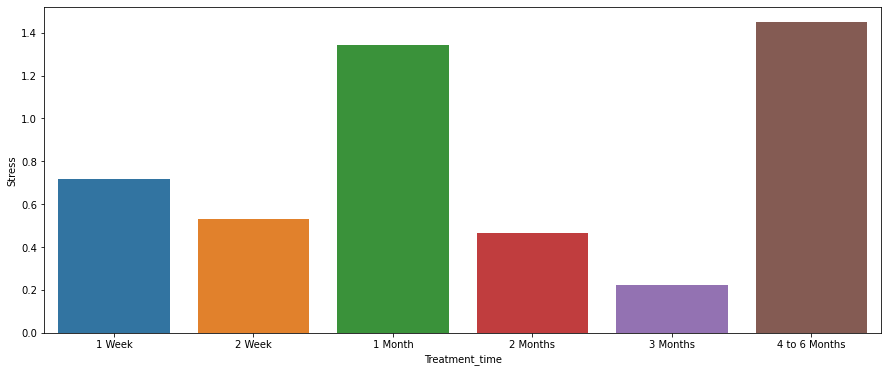

In [97]:
# A barplot of cohen's d for stress
plt.figure(figsize = (15,6))
sns.barplot(data=cohens, x='Treatment_time',y = 'Stress',order = ['1 Week','2 Week','1 Month','2 Months','3 Months','4 to 6 Months'] )

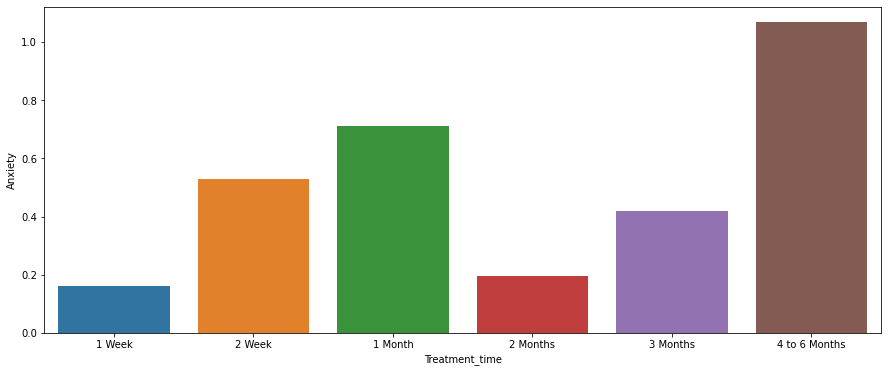

In [100]:
#A barplot of cohen's d values for anxiety
plt.figure(figsize = (15,6))
sns.barplot(data=cohens, x='Treatment_time',y = 'Anxiety',order = ['1 Week','2 Week','1 Month','2 Months','3 Months','4 to 6 Months'] )

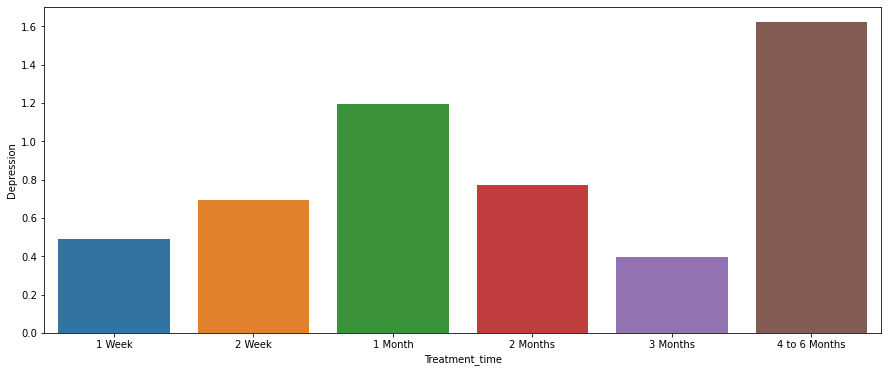

In [101]:
# A bar plot of cohen's d values across time in treatment for depression
plt.figure(figsize = (15,6))
sns.barplot(data=cohens, x='Treatment_time',y = 'Depression',order = ['1 Week','2 Week','1 Month','2 Months','3 Months','4 to 6 Months'] )

Text(0.5, 1.0, 'Effect Size During Treatment')

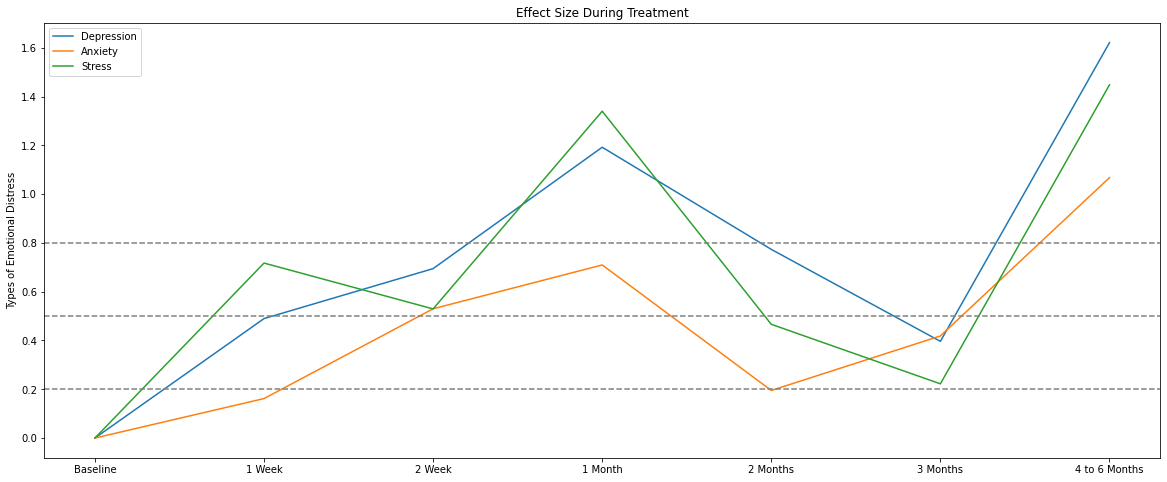

In [99]:
# Individual barplots are not very helpful. Here is a combined lineplot of cohen's d effect sizes across time in treatment.
# The results show a healthy range of effect sizes across time. Good evidence of treatment effectiveness.
plt.figure(figsize = (20,8))
graph = sns.lineplot(data=cohens, x='Treatment_time',y = 'Depression', sort = False)
graph2 = sns.lineplot(data=cohens, x='Treatment_time',y = 'Anxiety', sort = False)
graph3 = sns.lineplot(data=cohens, x='Treatment_time',y = 'Stress', sort = False)
thegraphofdoom = [graph, graph2, graph3]
graph.axhline(.80, ls='--',color='grey')
graph.axhline(.50, ls='--',color='grey')
graph.axhline(.20, ls='--',color='grey')
graph.set(xlabel='', ylabel='Types of Emotional Distress')
plt.legend(labels=['Depression', 'Anxiety', 'Stress'])
plt.title(label ='Effect Size During Treatment')

# Part 6. Exploring signifcant changes from baseline to 1 month in treatment
There is an upward trend in effectiveness over months in treatment but the average time in treatment is 38 days. This is closest to 1 month in treatment so an exploration of the first month in treatment might give a good indicator of how clients progress. This section uses paired t-tests to determine if there is a significant difference in DASS21 Stress, Anxiety and Depression scores from Baseline to 1 month in treatment. Cohen's d effect sizes are also calculated.

In [3]:
df = pd.read_csv('dass.csv')
df.head()

,ID,Date,Healing,Stress,Anxiety,Depression,Period,Tx_time,Change_stress,Percent_change_stress,Change_Anx,Percent_change_anx,Change_dep,Percent_change_dep
0,391,22/11/2019,1,32,26,32,Baseline,1,NaN,NaN,NaN,NaN,NaN,NaN
1,391,28/11/2019,1,18,18,24,1 Week,2,-14.0,-43.75,-8.0,-30.77,-8.0,-25.00
2,391,6/12/2019,1,22,18,16,2 Weeks,3,4.0,22.22,0.0,0.00,-8.0,-33.33
3,391,23/12/2019,1,18,16,20,1 month,4,-4.0,-18.18,-2.0,-11.11,4.0,25.00
4,391,23/01/2019,1,16,22,16,2 months,5,-2.0,-11.11,6.0,37.50,-4.0,-20.00


In [4]:
#I used SQL to create a new dataframe that contains only clients who have a tx period of Baseline or 1 month
import sqlite3
from pandas.io import sql
dass_T1_T2 = pd.read_csv('dass.csv',encoding = 'utf-8')
db_connection = sqlite3.connect('dass_T1_T2.db.sqlite')
dass_T1_T2.to_sql('dass_T1_T2', db_connection)

In [8]:
query = """
    SELECT ID, Stress, Anxiety, Depression, Period
    FROM dass_T1_T2
    WHERE Period LIKE 'Baseline'
    OR Period LIKE '1 month';
    """
dass_trimmed = sql.read_sql(query, con=db_connection)

In [9]:
dass_trimmed.shape

(153, 5)

In [11]:
dass_trimmed.isnull().sum()

ID            0
Stress        0
Anxiety       0
Depression    0
Period        0
dtype: int64

In [ ]:
dass_trimmed.to_csv(r'dass_df.csv', index = False)

In [38]:
#I cannot figure out how to create a dataframe that contains a row for baseline data and a row for 1 month data but deletes cases where there is just one of these rows but not both. Unfortuantely I have had to do this in excel and reimport it.
dass = pd.read_csv('dass_base_1month_longitudinal.csv')

In [14]:
dass.head()

,ID,Date,Healing,Stress_1_month,Anxiety_1_month,Depression_1_month,Period,ID.1,Date.1,Healing.1,Stress_Baseline,Anxiety_Baseline,Depression_Baseline,Period.1
0,103,2/01/2020,0,18,14,8,1 month,103,2/12/2019,0,26,18,20,Baseline
1,391,23/12/2019,1,18,16,20,1 month,391,22/11/2019,1,32,26,32,Baseline
2,514,1/07/2020,1,14,4,6,1 month,514,10/06/2020,1,26,16,16,Baseline
3,540,3/09/2019,0,26,8,42,1 month,540,26/07/2019,0,22,2,22,Baseline
4,568,18/05/2019,1,8,4,0,1 month,568,27/04/2019,1,16,4,6,Baseline


In [15]:
dass.shape

(41, 14)

In [ ]:
# The sections below calculate means, cohen's d values for baseline and 1 month in treatment
# Paired-ttests are also run to determine if signifcant differences are present.

In [16]:
# Paired t-test to determine if there are signifcant differences in stress from baseline to 1 month in treatment.
stats.ttest_rel(dass['Stress_Baseline'], dass['Stress_1_month'])

Ttest_relResult(statistic=7.406968388607767, pvalue=5.117987240361365e-09)

In [17]:
# Paired t-test to determine if there are signifcant differences in anxiety from baseline to 1 month in treatment.
stats.ttest_rel(dass['Anxiety_Baseline'], dass['Anxiety_1_month'])

Ttest_relResult(statistic=5.009629944263671, pvalue=1.1482153508871045e-05)

In [67]:
# Paired t-test to determine if there are signifcant differences in depression from baseline to 1 month in treatment.
t_test_dep = stats.ttest_rel(dass['Depression_Baseline'], dass['Depression_1_month'])

In [61]:
# Calculating means, std and then calculating cohen's d values for stress
Stress_Baseline_mean = dass['Stress_Baseline'].mean()
Stress_1_month_mean = dass['Stress_1_month'].mean()

Stress_Baseline_std = dass['Stress_Baseline'].std()
Stress_1_month_std = dass['Stress_1_month'].std()

mean_dif = Stress_1_month_mean - Stress_Baseline_mean
mean_std = (Stress_Baseline_std+Stress_1_month_std)/2
stress_d = mean_dif/mean_std

In [62]:
# Calculating means, std and then calculating cohen's d values for anxiety
Anxiety_Baseline_mean = dass['Anxiety_Baseline'].mean()
Anxiety_1_month_mean = dass['Anxiety_1_month'].mean()

Anxiety_Baseline_std = dass['Anxiety_Baseline'].std()
Anxiety_1_month_std = dass['Anxiety_1_month'].std()

mean_dif = Anxiety_1_month_mean - Anxiety_Baseline_mean
mean_std = (Anxiety_Baseline_std+Anxiety_1_month_std)/2
anxiety_d = mean_dif/mean_std

In [63]:
# Calculating means, std and then calculating cohen's d values for depression
Depression_Baseline_mean = dass['Depression_Baseline'].mean()
Depression_1_month_mean = dass['Depression_1_month'].mean()

Depression_Baseline_std = dass['Depression_Baseline'].std()
Depression_1_month_std = dass['Depression_1_month'].std()

mean_dif = Depression_1_month_mean - Depression_Baseline_mean
mean_std = (Depression_Baseline_std+Depression_1_month_std)/2
depression_d = mean_dif/mean_std

In [60]:
print("Depression--------------")
print("Baseline depression = ", round(Depression_Baseline_mean,2),"(SD =", round(Depression_Baseline_std,2),")")
print("1 month depression = ", round(Depression_1_month_mean,2),"(SD =", round(Depression_1_month_std,2),")")
print("Depression Cohen's d =", round(depression_d,2))
print("")
print("Anxiety--------------")
print("Baseline anxiety = ", round(Anxiety_Baseline_mean,2),"(SD =", round(Anxiety_Baseline_std,2),")")
print("1 month anxiety = ", round(Anxiety_1_month_mean,2),"(SD =", round(Anxiety_1_month_std,2),")")
print("Anxiety Cohen's d =", round(anxiety_d,2))
print("")
print("Stress--------------")
print("Baseline stress = ", round(Stress_Baseline_mean,2),"(SD =", round(Stress_Baseline_std,2),")")
print("1 month stress = ", round(Stress_1_month_mean,2),"(SD =", round(Stress_1_month_std,2),")")
print("Stress Cohen's d =", round(stress_d,2))

Depression--------------
Baseline depression =  20.54 (SD = 10.11 )
1 month depression =  9.71 (SD = 8.18 )
Depression Cohen's d = -1.18

Anxiety--------------
Baseline anxiety =  15.9 (SD = 10.85 )
1 month anxiety =  9.32 (SD = 7.66 )
Anxiety Cohen's d = -0.71

Stress--------------
Baseline stress =  25.61 (SD = 8.85 )
1 month stress =  14.63 (SD = 7.7 )
Stress Cohen's d = -1.33


In [22]:
dass = pd.read_csv('dass_df.csv')
dass.head()

,ID,Stress,Anxiety,Depression,Period
0,103,26,18,20,Baseline
1,103,18,14,8,1 month
2,391,32,26,32,Baseline
3,391,18,16,20,1 month
4,514,26,16,16,Baseline


In [28]:
# Here I am validating the calculated means and st devs with what pandas provides.
dass.groupby('Period').describe().T

Period               1 month    Baseline
ID         count   41.000000   41.000000
           mean   750.000000  750.000000
           std    159.643979  159.643979
           min    103.000000  103.000000
           25%    686.000000  686.000000
           50%    789.000000  789.000000
           75%    858.000000  858.000000
           max    939.000000  939.000000
Stress     count   41.000000   41.000000
           mean    14.634146   25.609756
           std      7.699857    8.845558
           min      0.000000    8.000000
           25%      8.000000   18.000000
           50%     14.000000   28.000000
           75%     20.000000   32.000000
           max     30.000000   40.000000
Anxiety    count   41.000000   41.000000
           mean     9.317073   15.902439
           std      7.663025   10.853121
           min      0.000000    0.000000
           25%      4.000000    6.000000
           50%      8.000000   14.000000
           75%     14.000000   24.000000
           max     32.000000   40.000000
Depression count   41.000000   41.000000
           mean     9.707317   20.536585
           std      8.179987   10.109643
           min      0.000000    2.000000
           25%      4.000000   14.000000
           50%      8.000000   22.000000
           75%     14.000000   26.000000
           max     42.000000   42.000000

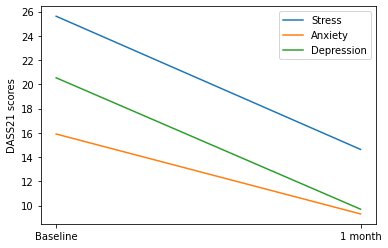

In [23]:
#Plotting changes from baseline to 1 month in treatment
sns.lineplot(x="Period", y="Stress",data=dass, err_style = None, sort= False)
sns.lineplot(x="Period", y="Anxiety",data=dass, err_style = None, sort= False)
sns.lineplot(x="Period", y="Depression",data=dass, err_style = None, sort= False)
plt.xlabel("")
plt.ylabel("DASS21 scores")
plt.legend(labels=['Stress', 'Anxiety', 'Depression'])

<b> Summary </b> Significant reductions in stress, anxiety and depression are seen from baseline to 1 month in treatment. Good effect sizes are also present. Strong effect sizes for stress and depression and medium to strong for anxiety. This seems right to me as anxiety is typically more resistant to intervention than stress and depression.

# Part 7. Change in state affect when receiving "energy medicine" interventions
The results so far provide suffiecient evidence that there is some effect of treatment on psychological wellbeing but can the same be said for the more controversial complementary therapies used? When receiving "energy medicine" which uses sounds from Tibetan singing bowls and energy channeled through the body - clients are asked to provide pre-post rating of stress and relaxation. E.g. "How relaxed do you feel now on a scale of 1 to 10?". This data is used to calculate an effect size of state affect. State affect is emotion at a particular point in time as opposed to mood which is mood over a sustained period.

In [63]:
relax = pd.read_csv('Shamanic_Relaxation_Data.csv')
distress = pd.read_csv('Shamanic_Distress_Data.csv')

In [103]:
relax.describe()

,ID,Pre-relaxation,Post-relaxation,Reduction,Occurences,Mean_diff
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,649.516129,3.677419,7.983871,4.306452,1.903226,4.290323
std,213.818043,1.871041,1.654521,1.788751,1.289423,1.572167
min,17.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,520.000000,2.000000,7.000000,3.000000,1.000000,3.000000
50%,686.000000,3.500000,8.000000,4.000000,1.000000,4.000000
75%,801.000000,5.000000,9.000000,5.000000,2.000000,5.000000
max,939.000000,9.000000,10.000000,8.000000,5.000000,8.000000


In [104]:
distress.describe()

,ID,Pre-distress,Post-distress,Reduction,Occurances,Mean_diff
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,612.634615,6.230769,2.134615,4.096154,2.038462,4.076923
std,213.809612,1.874654,1.760446,1.751857,1.357066,1.569890
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,465.000000,5.000000,1.000000,3.000000,1.000000,3.000000
50%,675.000000,6.500000,2.000000,4.000000,1.000000,4.000000
75%,760.250000,8.000000,3.000000,5.000000,3.000000,5.000000
max,939.000000,10.000000,10.000000,8.000000,5.000000,8.000000


In [70]:
relax1 = relax['Pre-relaxation']
relax2 = relax['Post-relaxation']
distress1 = distress['Pre-distress']
distress2 = distress['Post-distress']

In [71]:
#Repeated measured t-test indicates signficant increase in relaxation immediately after the EM intervention.
stats.ttest_rel(relax['Pre-relaxation'], relax['Post-relaxation'])

Ttest_relResult(statistic=-18.9568227079216, pvalue=2.9679095158226247e-27)

In [102]:
#Calculating the effect size
prerelax_mean = relax['Pre-relaxation'].mean()
postrelax_mean = relax['Post-relaxation'].mean()
prerelax_std = relax['Pre-relaxation'].std()
postrelax_std = relax['Post-relaxation'].std()
mean_dif = postrelax_mean - prerelax_mean
mean_std = (prerelax_std+postrelax_std)/2
d = mean_dif/mean_std
print("Pre relaxation mean =",round(prerelax_mean,2))
print("Pre relaxation std =",round(prerelax_std,2))
print("Post relaxation mean =",round(postrelax_mean,2))
print("Post relaxation std =",round(postrelax_std,2))
print("Cohen's d =",round(d,2))

Pre relaxation mean = 3.68
Pre relaxation std = 1.87
Post relaxation mean = 7.98
Post relaxation std = 1.65
Cohen's d = 2.44


The data was also run through SPSS - a statistical package used frequently in the behavioural sciences. The results are similar and confirm a strong cohen's d value. I just did this to be sure my coding skills were correct.   

<img align="left" width="500" height="500" src="Jasp_relaxation.png">

In [73]:
#Repeated measured t-test indicates signficant redcution in stress immediately after the EM intervention.
stats.ttest_rel(distress['Pre-distress'], distress['Post-distress'])

Ttest_relResult(statistic=16.860838448994645, pvalue=1.6798948367561027e-22)

In [103]:
predistress_mean = distress['Pre-distress'].mean()
postdistress_mean = distress['Post-distress'].mean()
predistress_std = distress['Pre-distress'].std()
postdistress_std = distress['Post-distress'].std()
mean_dif = postdistress_mean - predistress_mean
mean_std = (predistress_std+postdistress_std)/2
d = mean_dif/mean_std
print("Pre distress mean =",round(predistress_mean,2))
print("Pre distress std =",round(predistress_std,2))
print("Post distress mean =",round(postdistress_mean,2))
print("Post distress std =",round(postdistress_std,2))
print("Cohen's d =",round(d,2))

Pre distress mean = 6.23
Pre distress std = 1.87
Post distress mean = 2.13
Post distress std = 1.76
Cohen's d = -2.25


An analysis with SPSS again confirmed the findings.

<img align="left" width="500" height="500" src="Jasp_distress.png">

<b> Summary </b>   
There is sufficient evidence here to indicate the EM interventions results in significant reductions in state distress and increases in state relaxation. The effect of this intervention is very strong ranging around 2.3. With this level of effect clinicians can be very confident that they can bring even highly distress clients back to a calm state, suggesting energy medicine is worth further use in the practice as a distress management intervention.

In [78]:
# At this point I decided to add some visualisations of these changes.
relax_pre_post = pd.read_csv('Shamanic_Relaxation_Pre_Post.csv')
distress_pre_post = pd.read_csv('Shamanic_Distress_Pre_post.csv')

In [93]:
relax_pre_post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          124 non-null    int64  
 1   Date        124 non-null    object 
 2   Relaxation  124 non-null    float64
 3   Period      124 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 4.0+ KB


In [91]:
relax_pre_post.Relaxation = relax_pre_post.Relaxation.astype(float)

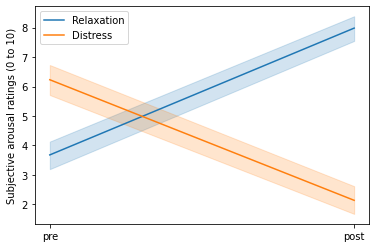

In [104]:
sns.lineplot(x="Period", y="Relaxation", data=relax_pre_post, sort= False)
sns.lineplot(x="Period", y="Distress",data=distress_pre_post, sort= False)
plt.xlabel("")
plt.ylabel("Subjective arousal ratings (0 to 10)")
plt.legend(labels=['Relaxation', 'Distress'])

#ax = sns.lineplot(x='Relaxation', y='Period', data=relax_pre_post)
#ax.ticklabel_format(axis='x', useOffset=False)
#plt.show()

In [110]:
#Trying to merge the files so I can calculate correlations between relaxation and distress.
healing = pd.merge(relax, distress, on='ID',how='left')

In [111]:
healing.head()

,ID,Date_x,Pre-relaxation,Post-relaxation,Reduction_x,Occurences,Mean_diff_x,Date_y,Pre-distress,Post-distress,Reduction_y,Occurances,Mean_diff_y
0,684,24/08/2019,3,6,3,2,4,24/08/2019,7.0,4.0,3.0,2.0,4.0
1,684,24/08/2019,3,6,3,2,4,30/10/2019,7.0,3.0,4.0,2.0,4.0
2,684,30/10/2019,3,7,4,2,4,24/08/2019,7.0,4.0,3.0,2.0,4.0
3,684,30/10/2019,3,7,4,2,4,30/10/2019,7.0,3.0,4.0,2.0,4.0
4,396,5/11/2019,4,9,5,1,5,5/11/2019,6.0,1.0,5.0,1.0,5.0


In [112]:
healing_corr = healing[['Pre-relaxation','Post-relaxation', 'Pre-distress', 'Post-distress']]
healing_corr.corr(method='pearson')

,Pre-relaxation,Post-relaxation,Pre-distress,Post-distress
Pre-relaxation,1.000000,0.453580,-0.611449,-0.373875
Post-relaxation,0.453580,1.000000,-0.351441,-0.758358
Pre-distress,-0.611449,-0.351441,1.000000,0.478945
Post-distress,-0.373875,-0.758358,0.478945,1.000000


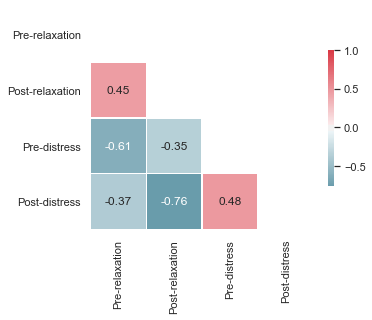

In [115]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(healing_corr.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(healing_corr.corr(), mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show();

<b> Summary </b> Correlations have been run between distress and relaxation because some may wonder why I have used the same construct. They may think relaxation is the opposite of distress. The fact is they are not perfectly oppossed as shown by the negative but not strong correlations. Sometimes a client may report being distressed and relaxed at the same time.

# Part 8. Can those progressing well in treatment be identified?
While DASS21 and state affect measures are useful metrics for determining change they do not always represent appropriate response to treatment. For instance a person may be going thorugh a marriage breakdown and be highly stressed but handling the situation very well. If stress is used as an indicator of recovery it can be misleading. it will suggest the client is not improving, whereas the clinical judgement of the therapist may suggest that the client is appropriately stressed for the context of the situation but responding well to treatment (i.e. they are attempting between sessions therapy tasks, they are developing self-awareness and insight, they are refraining from substance use despite adversity etc). For this reason the clinician provides a binary (0 = not responding well; 1 = responding well) indicator of change. With this metric classification models can be used to try and predict those who respond well to treatment.   
   
Target variable:   
* Progress   

Feature variables:   
* Age
* Gender
* Personality
* Complementary
* Healing
* Rapport

Supervised learning models used
* Random forest
* Logistic regression
* KNN
* XG Boost
* Naive Bayes
* SVM


In [2]:
## reading and inspect the data
df = pd.read_csv('progress.csv')
print(df.dtypes)
df.head()

ID                        int64
Healing                   int64
Complementary_Client      int64
Age                     float64
Gender                    int64
Personality_disorder      int64
Good_rapport              int64
Progress                  int64
dtype: object


,ID,Healing,Complementary_Client,Age,Gender,Personality_disorder,Good_rapport,Progress
0,6,0,0,55.0,1,1,0,0
1,17,1,1,40.0,1,0,0,1
2,26,0,0,51.0,1,0,1,1
3,27,0,0,34.0,1,0,0,1
4,32,0,1,39.0,0,0,1,1


In [3]:
# change the names of the columns and inspect again
df.columns = ['ID', 'Healing', 'Complementary', 'Age', 'Gender','Personality','Rapport','Progress']
df.columns

Index(['ID', 'Healing', 'Complementary', 'Age', 'Gender', 'Personality',
       'Rapport', 'Progress'],
      dtype='object')

In [4]:
# Drop ID because it is a code from the CRM and not needed
df = df.drop(['ID'], axis=1)

In [5]:
# get more information on the data
df.describe()

,Healing,Complementary,Age,Gender,Personality,Rapport,Progress
count,211.000000,211.000000,174.000000,211.000000,211.000000,211.000000,211.000000
mean,0.274882,0.464455,38.344828,0.469194,0.203791,0.578199,0.606635
std,0.447516,0.499921,11.633445,0.500237,0.403774,0.495021,0.489658
min,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,38.000000,0.000000,0.000000,1.000000,1.000000
75%,1.000000,1.000000,46.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,69.000000,1.000000,1.000000,1.000000,1.000000


<b> Data preparation </b>

In [7]:
# Check for missing values
df.isnull().sum()

Healing           0
Complementary     0
Age              37
Gender            0
Personality       0
Rapport           0
Progress          0
dtype: int64

In [28]:
print('mean age = ', df.Age.mean())
print('median age =', df.Age.median())

mean age =  38.3448275862069
median age = 38.0


In [6]:
# Replace missing age with median but both mean and median are the same
df.Age = df.Age.fillna(df.Age.median())

In [27]:
df.isnull().sum()

Healing          0
Complementary    0
Age              0
Gender           0
Personality      0
Rapport          0
Progress         0
dtype: int64

In [31]:
# create X and y to match Scikit-Learn parlance
features = ['Healing', 'Complementary', 'Age', 'Gender','Personality','Rapport']
outcome = 'Progress'

# X include all the features
X = df[features].copy()

# y is the target variable
y = df[outcome].astype(str).copy()

In [32]:
## Check the data
print('X has %d rows and %d columns' % X.shape)
print('y has %d rows' % y.shape)

X has 211 rows and 6 columns
y has 211 rows


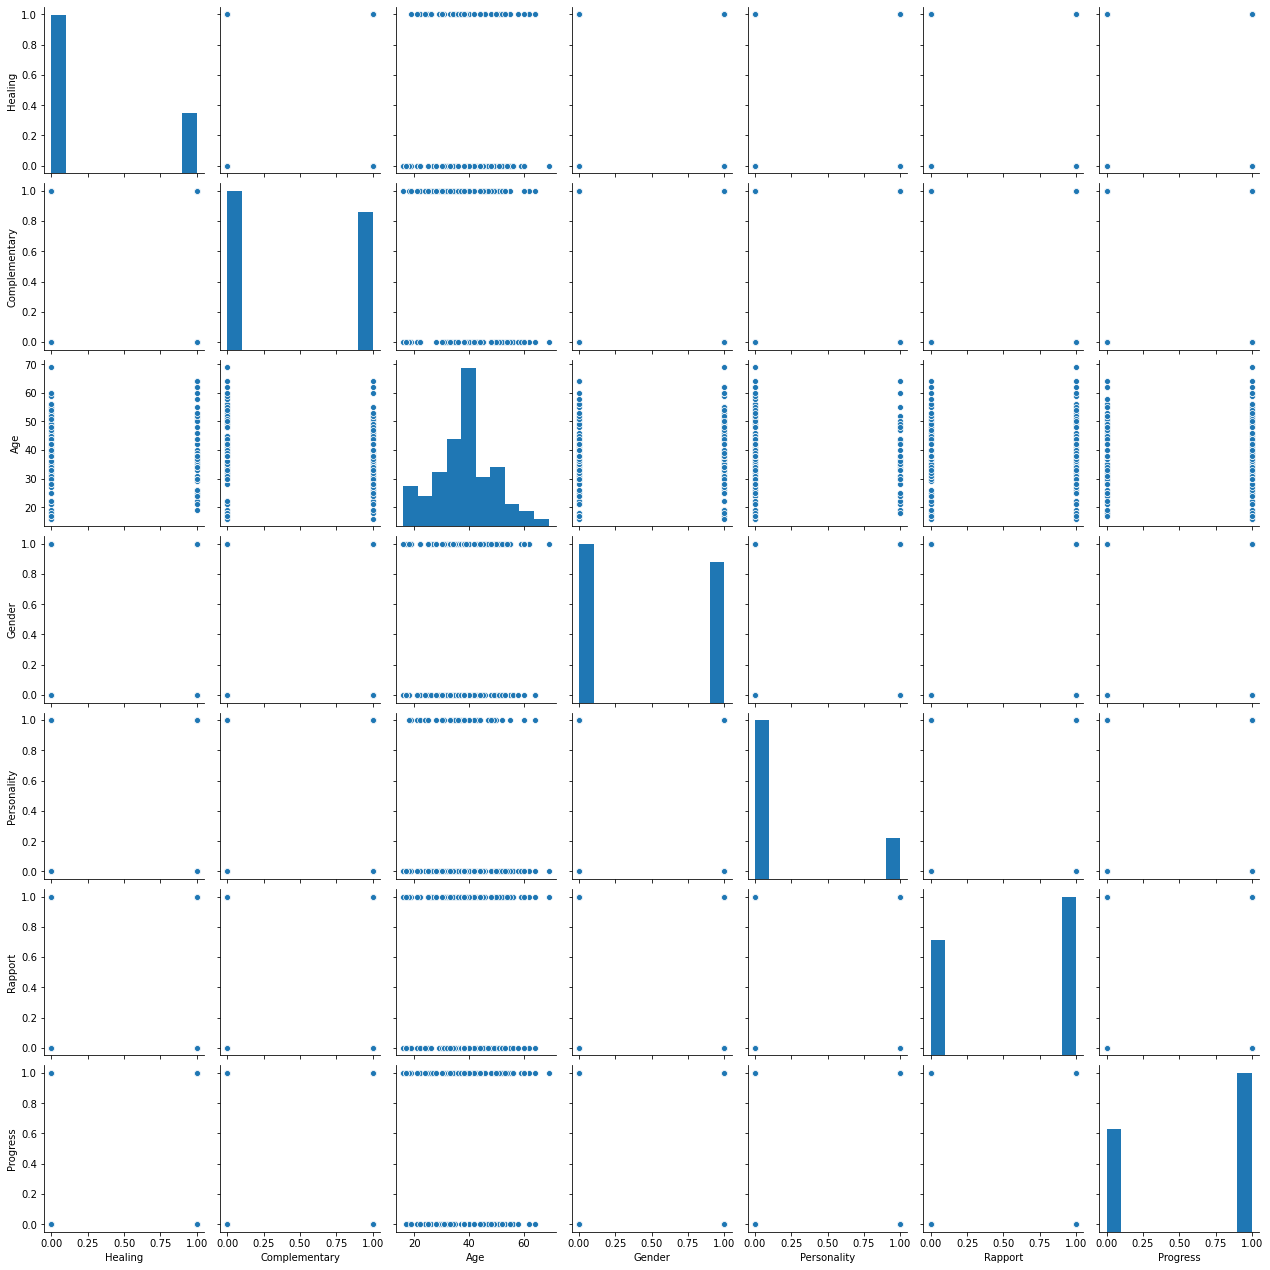

In [33]:
#printing some pair plots but because its mostly binary data there won't likley be much to see.
sns.pairplot(df)
plt.show()

<b> Split the data </b>

In [ ]:
## Create training and testing subsets.
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2,
                                                    random_state = 100666001,
                                                    stratify = y)

<b> Define the Random Forest Model </b>

In [112]:
model = RandomForestClassifier(n_estimators = 1000, max_depth = 5)
print(model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


<b> Fit the random forest model to the training data </b>

In [113]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

<b> Evaluates the training model </b>

In [38]:
#This creates the function for reporting summary statistics of the model
def show_summary_report(actual, prediction, probabilities):

    if isinstance(actual, pd.Series):
        actual = actual.values.astype(int)
    prediction = prediction.astype(int)

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_score(actual, prediction))
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_score(actual, prediction))
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_score(actual, prediction))
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_score(actual, probabilities[:, 1]))
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction)
    average_precision = average_precision_score(actual, prediction)
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, probabilities[:, 1])
    roc_auc = auc(fpr, tpr)

    # plot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')
    
    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')

    plt.show()

In [114]:
# Fit the model the y in the training dataset
y_train_pred = model.predict(X_train)
y_train_prob = model.predict_proba(X_train)

Accuracy : 0.8333 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8364 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9020 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9153                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


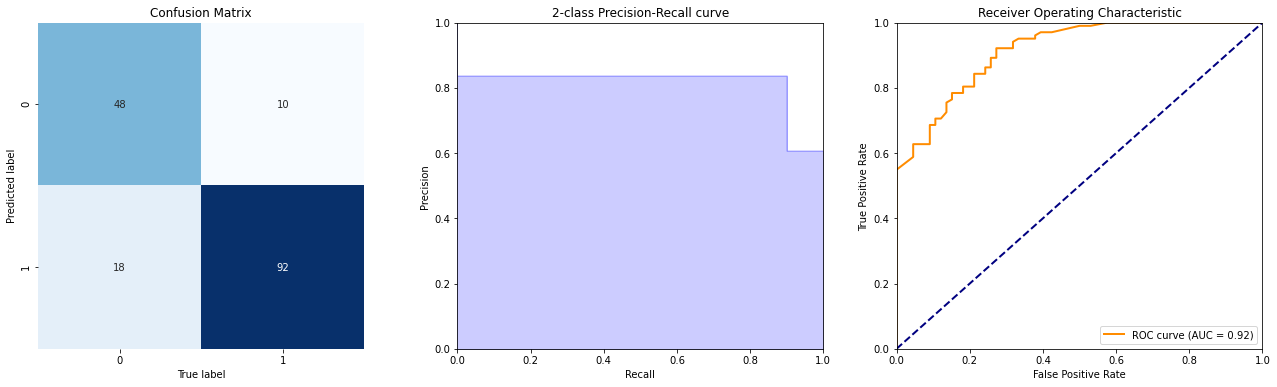

In [115]:
# Show the fit statistics with the summary_report feature created above.
show_summary_report(y_train, y_train_pred, y_train_prob)

<b> Evaluate the training model with the test data </b>

In [116]:
#Apply the model to the test data
y_test_pred = model.predict(X_test)
y_test_prob = model.predict_proba(X_test)

Accuracy : 0.6512 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7391 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.6538 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.6403                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


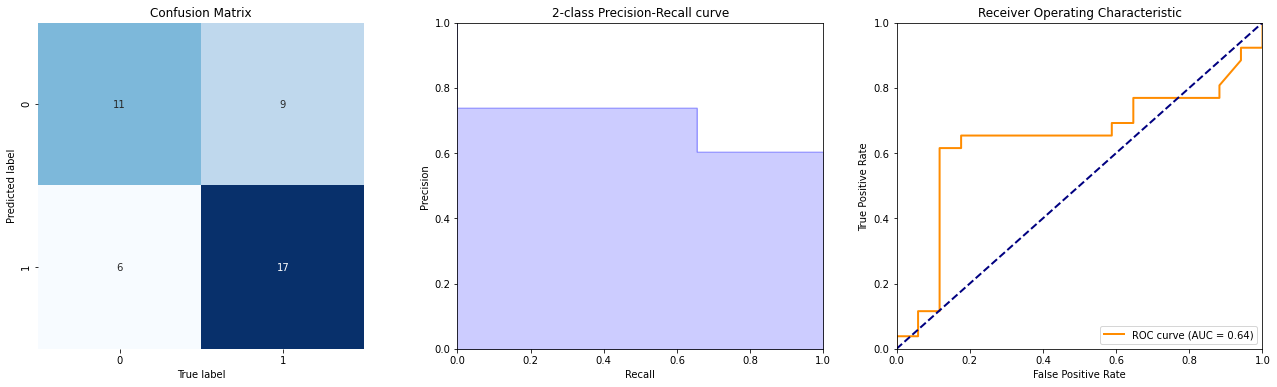

In [117]:
# Show a summary of the statistics for the test data and compare it with the summary results of the training data
show_summary_report(y_test, y_test_pred,y_test_prob)

In [110]:
X.columns

Index(['Healing', 'Complementary', 'Age', 'Gender', 'Personality', 'Rapport'], dtype='object')

In [118]:
model.feature_importances_

array([0.05249737, 0.05691422, 0.41924844, 0.04769556, 0.07390393,
       0.34974047])

<b> Summary:</b> The is huge variation in the accuracy of the training and testing models, so this model in its current format is not too good.

<b> Feature engineering the random forest model </b>   
To improve the model various exploration have been made with the depth and n_estimators. This is the best model found.

Accuracy : 0.7321 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7767 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7843 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8039                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


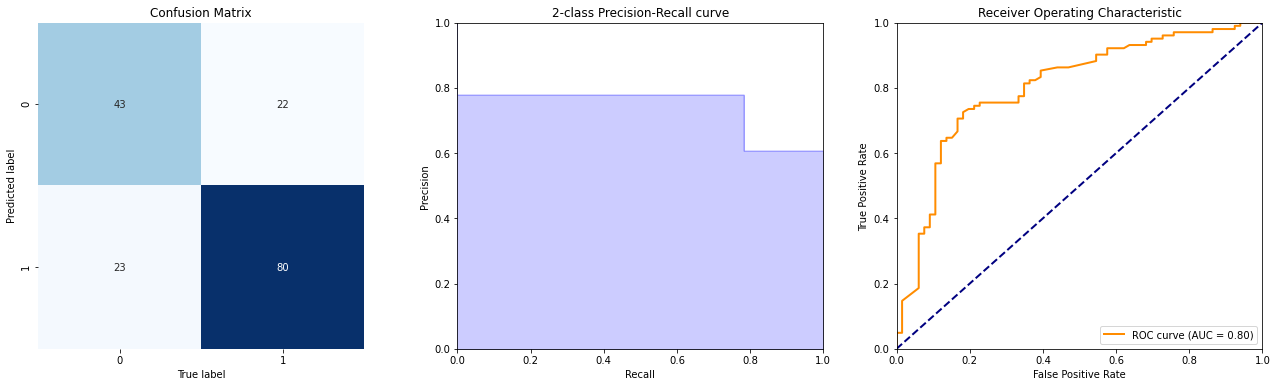

In [119]:
model = RandomForestClassifier(n_estimators = 1000, max_depth = 2)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_train_prob = model.predict_proba(X_train)
y_test_pred = model.predict(X_test)
y_test_prob = model.predict_proba(X_test)
show_summary_report(y_train, y_train_pred, y_train_prob)

Accuracy : 0.7442 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8000 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7692 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7579                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


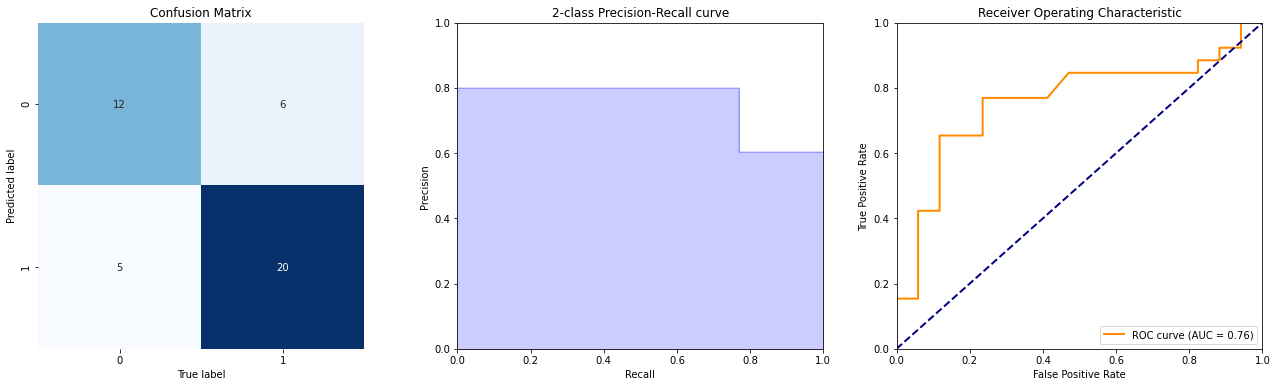

In [120]:
show_summary_report(y_test, y_test_pred,y_test_prob)

In [121]:
X.columns

Index(['Healing', 'Complementary', 'Age', 'Gender', 'Personality', 'Rapport'], dtype='object')

In [122]:
model.feature_importances_

array([0.03699294, 0.04513554, 0.25333991, 0.04122028, 0.07541035,
       0.54790098])

<b> Summary: </b> When there is a depth of 2 the model fits the data more accurately with less overfitting. The features contributing to the model are Age and Rapport, with less contribution from Personality. The model accuracy value suggests it predicts 74% of the variability. The precision value suggests it accurately labels 80% of clients progressing well as progressing well. The recall metric suggests the model accurately labels 77% of clients.

### Testing the data with a logistic regression model

In [71]:
from sklearn.linear_model import LogisticRegression
lrmodel = LogisticRegression()
print(lrmodel)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [72]:
lrmodel.fit(X_train, y_train)
y_train_pred = lrmodel.predict(X_train)
y_train_prob = lrmodel.predict_proba(X_train)
y_test_pred = lrmodel.predict(X_test)
y_test_prob = lrmodel.predict_proba(X_test)

Accuracy : 0.7321 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7879 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7647 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7620                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


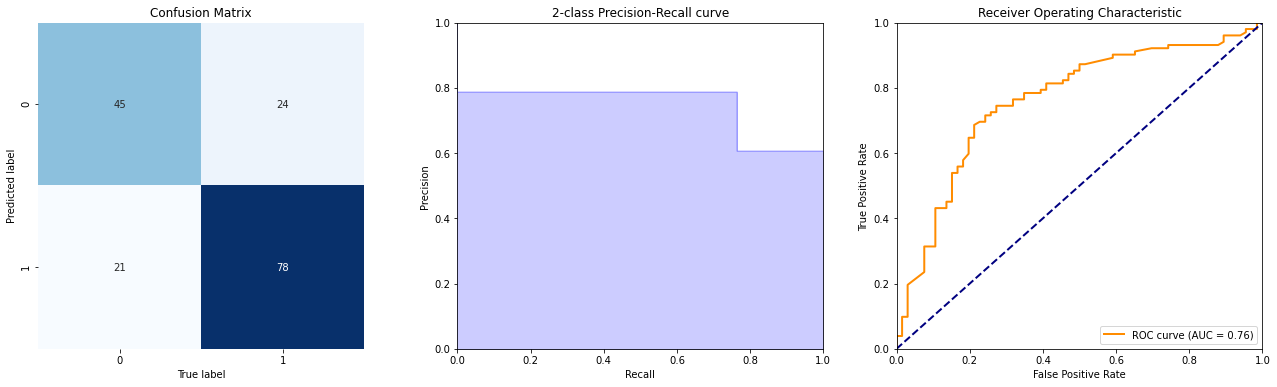

In [73]:
show_summary_report(y_train, y_train_pred, y_train_prob)

Accuracy : 0.7674 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8333 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7692 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8009                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


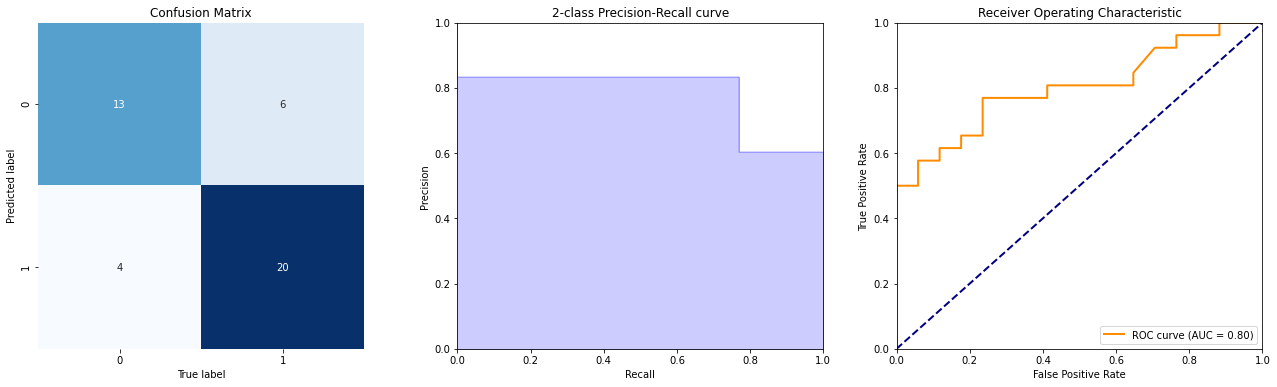

In [74]:
show_summary_report(y_test, y_test_pred,y_test_prob)

<b> Summary </b> The logistic regression model is pretty much as good as the random forest model.

### Testing the data with a xgbclassifier model

In [83]:
xgbmodel = XGBClassifier(n_estimators = 6, max_depth = 2, booster="gbtree")
print(xgbmodel)
xgbmodel.fit(X_train, y_train)
y_train_pred = xgbmodel.predict(X_train)
y_train_prob = xgbmodel.predict_proba(X_train)
y_test_pred = xgbmodel.predict(X_test)
y_test_prob = xgbmodel.predict_proba(X_test)

XGBClassifier(base_score=None, booster='gbtree', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=2,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=6, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)


Accuracy : 0.7262 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7857 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7549 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7914                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


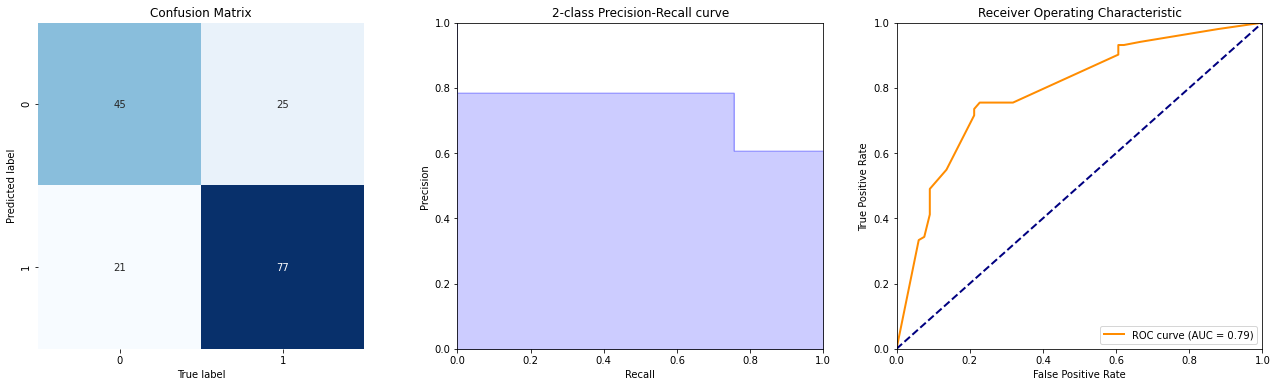

In [84]:
show_summary_report(y_train, y_train_pred, y_train_prob)

Accuracy : 0.6977 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7600 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7308 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7149                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


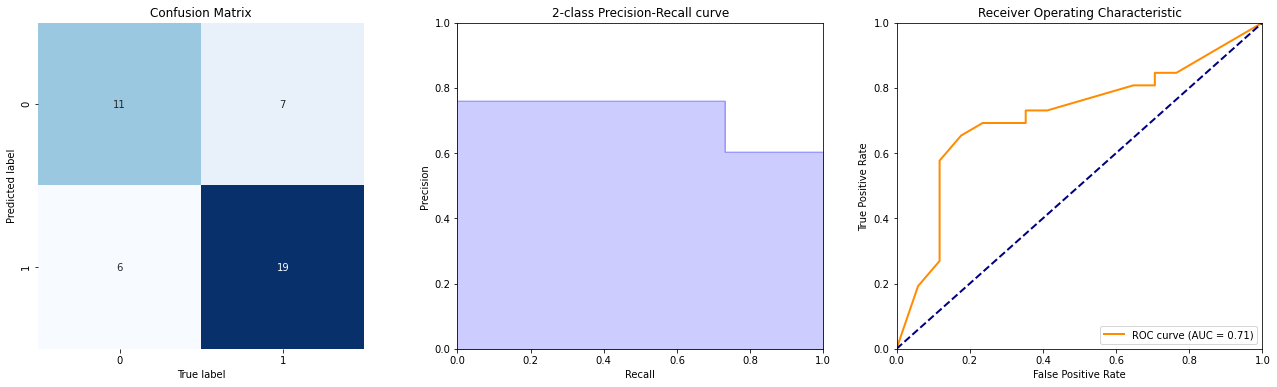

In [80]:
show_summary_report(y_test, y_test_pred,y_test_prob)

<b> Summary: </b> Despite various attempts at engineering the XGBClassifier it does not perform as well as the logistic regression or random forest models. The accuracy, precision and recall values are not quite as good and there is more variability between the train and test models.

### Testing the data with Support Vector Machine model

In [134]:
from sklearn.svm import SVC

In [141]:
SVCmodel = SVC(probability = True)
print(SVCmodel)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [142]:
SVCmodel.fit(X_train, y_train)
y_train_pred = SVCmodel.predict(X_train)
y_train_prob = SVCmodel.predict_proba(X_train)
y_test_pred = SVCmodel.predict(X_test)
y_test_prob = SVCmodel.predict_proba(X_test)

Accuracy : 0.6071 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.6071 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 1.0000 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7686                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


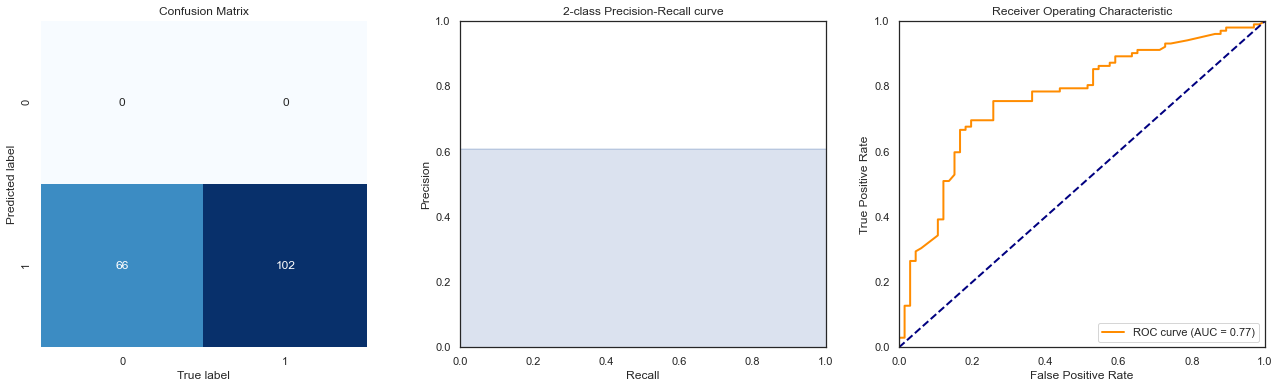

In [137]:
show_summary_report(y_train, y_train_pred, y_train_prob)

Accuracy : 0.6047 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.6047 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 1.0000 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8032                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


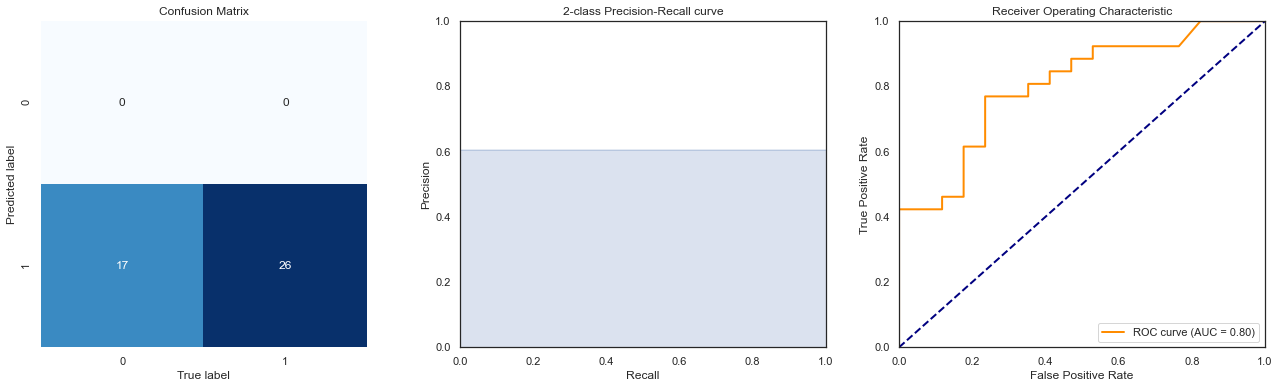

In [138]:
show_summary_report(y_test, y_test_pred,y_test_prob)

<b> Summary:</b> The SVM model is not very good. Its accuracy is poorer than the other models and precision and recall are not available. 

### Applying the Naive Bayes Classification model

In [116]:
from sklearn.naive_bayes import GaussianNB 

In [124]:
gnbmodel = GaussianNB()
print(gnbmodel)

GaussianNB(priors=None, var_smoothing=1e-09)


In [125]:
gnbmodel.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [127]:
# Fit the model the y in the training dataset
y_train_pred = gnbmodel.predict(X_train)
y_train_prob = gnbmodel.predict_proba(X_train)

Accuracy : 0.7262 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7857 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7549 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7553                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


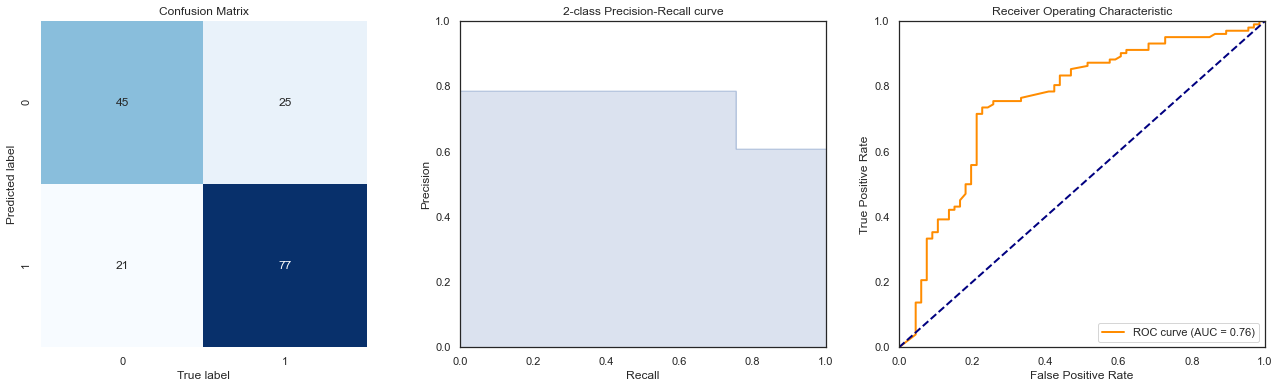

In [128]:
# Show the fit statistics with the summary_report feature created above.
show_summary_report(y_train, y_train_pred, y_train_prob)

In [129]:
#Apply the model to the test data
y_test_pred = gnbmodel.predict(X_test)
y_test_prob = gnbmodel.predict_proba(X_test)

Accuracy : 0.7674 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8333 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7692 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7760                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


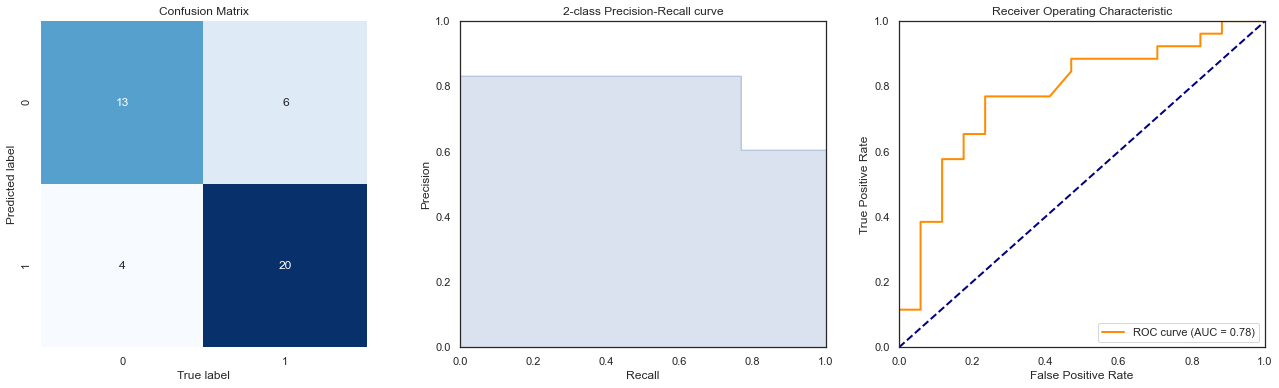

In [130]:
# Show a summary of the statistics for the test data and compare it with the summary results of the training data
show_summary_report(y_test, y_test_pred,y_test_prob)

<b> Summary </b>   
The Naive Bayes algorythm does nearly as good a job as the logistic regression and random forest models. The main differences is a greater variation in the train/test accuracy metric.

### Testing the data with K Nearest Neighbour

In [7]:
# create X and y to match Scikit-Learn parlance
features = ['Healing', 'Complementary', 'Age', 'Gender','Personality','Rapport']
outcome = 'Progress'

# X include all the features
X = df[features].copy()

# y is the target variable
y = df[outcome].astype(str).copy()

In [8]:
## Create training and testing subsets.
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2,
                                                    random_state = 100666001,
                                                    stratify = y)

In [9]:
KNN_model = KNeighborsClassifier(n_neighbors=5)
print(KNN_model)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


In [10]:
KNN_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [12]:
# Fit the model the y in the training dataset
y_train_pred = KNN_model.predict(X_train)
y_train_prob = KNN_model.predict_proba(X_train)

Accuracy : 0.7143 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7328 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.8333 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7806                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


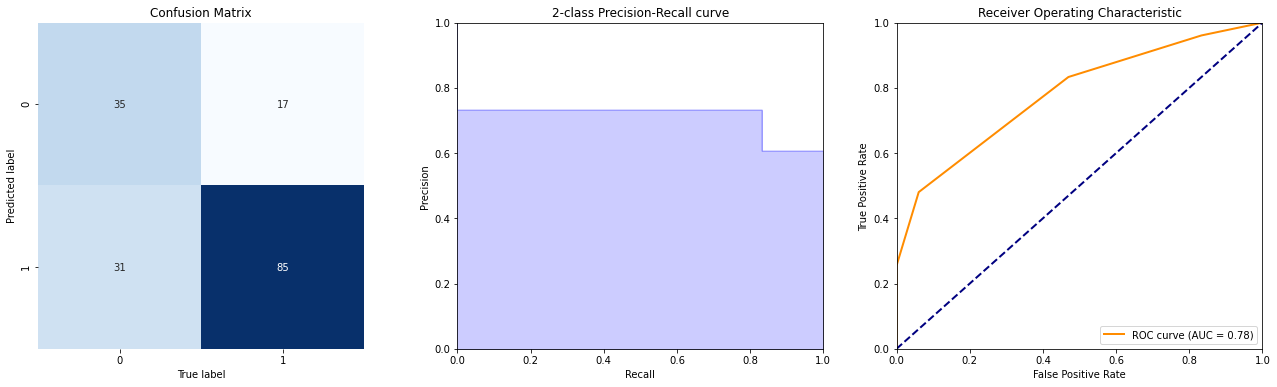

In [13]:
# Show the fit statistics with the summary_report feature created above.
show_summary_report(y_train, y_train_pred, y_train_prob)

In [14]:
#Apply the model to the test data
y_test_pred = KNN_model.predict(X_test)
y_test_prob = KNN_model.predict_proba(X_test)

Accuracy : 0.5116 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.5926 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.6154 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.4536                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


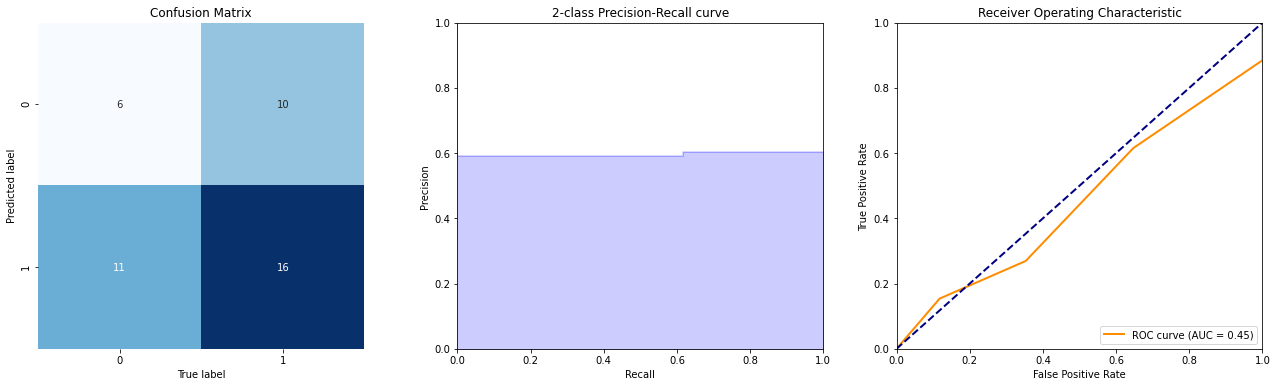

In [15]:
# Show a summary of the statistics for the test data and compare it with the summary results of the training data
show_summary_report(y_test, y_test_pred,y_test_prob)

<b> Summary:</b> KNN model suffers badly from overfitting and does not perform as well as the previous models used. 

## Summary
Several supervised classification model have been run - logistic regression, random forests, XGB classifier, SVM, KNN and Naive Bayes - and of these the logistic regression and random forest are the best with an accuracy of around .74 and relevant features of Age and Rapport identified.

# Part 9. Predicting those who receive energy medicine intervention
This was added as a supplemental analysis. I was wondering it I can predict those clients who receive energy medicine. This would help refine the scope of the business to service those in its niche rather than spend resources on clients that could be seen just as easily at a regular psychology practice. Working with clients who are dimissive of complementary approaches is not as rewarding for the therapist and contibutes to burnout.   
   
Features in this model do not include 'Progress' and ' Rapport' as thes things are not known until a client has had a few sessions with this clinician.

## Random forest model

In [40]:
# create X and y to match Scikit-Learn parlance
features = ['Complementary', 'Age', 'Gender','Personality']
outcome = 'Healing'

# X include all the features
X = df[features].copy()

# y is the target variable
y = df[outcome].astype(str).copy()

In [41]:
## Create training and testing subsets.
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2,
                                                    random_state = 100666001,
                                                    stratify = y)

Accuracy : 0.7440 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8000 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.0870 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8287                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


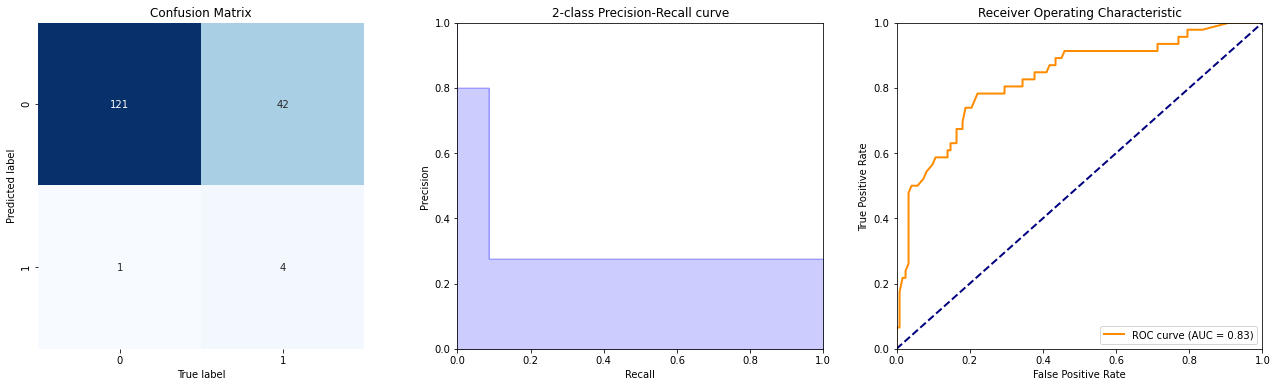

In [42]:
model = RandomForestClassifier(n_estimators = 1000, max_depth = 2)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_train_prob = model.predict_proba(X_train)
y_test_pred = model.predict(X_test)
y_test_prob = model.predict_proba(X_test)
show_summary_report(y_train, y_train_pred, y_train_prob)

Accuracy : 0.7209 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.0000 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.0000 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8360                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


C:\Users\Signature\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


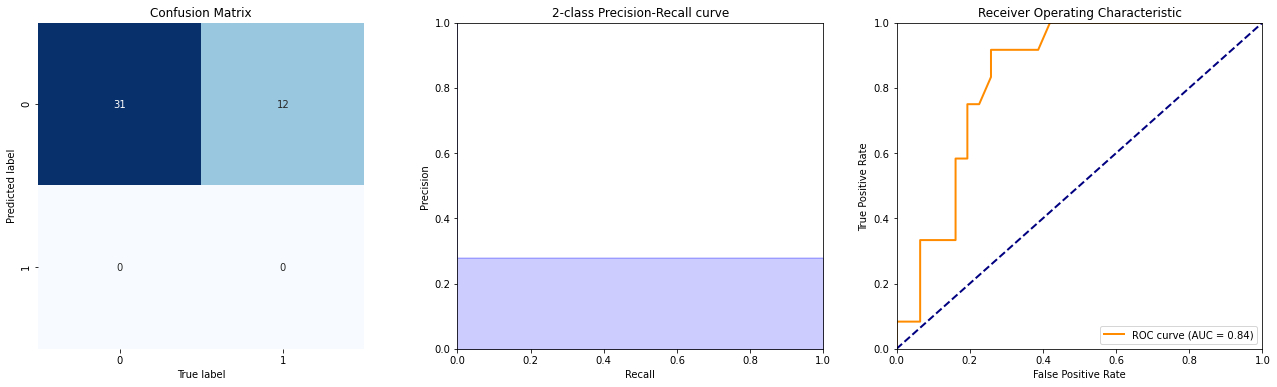

In [44]:
show_summary_report(y_test, y_test_pred,y_test_prob)

In [43]:
X.columns

Index(['Complementary', 'Age', 'Gender', 'Personality'], dtype='object')

In [45]:
model.feature_importances_

array([0.55311043, 0.26719416, 0.16074452, 0.01895088])

### KNN

In [33]:
# create X and y to match Scikit-Learn parlance
features = ['Complementary', 'Age', 'Gender','Personality']
outcome = 'Healing'

# X include all the features
X = df[features].copy()

# y is the target variable
y = df[outcome].astype(str).copy()

In [34]:
## Create training and testing subsets.
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2,
                                                    random_state = 100666001,
                                                    stratify = y)

In [35]:
KNN_model = KNeighborsClassifier(n_neighbors=5)
print(KNN_model)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


Accuracy : 0.8095 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7500 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.4565 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8466                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


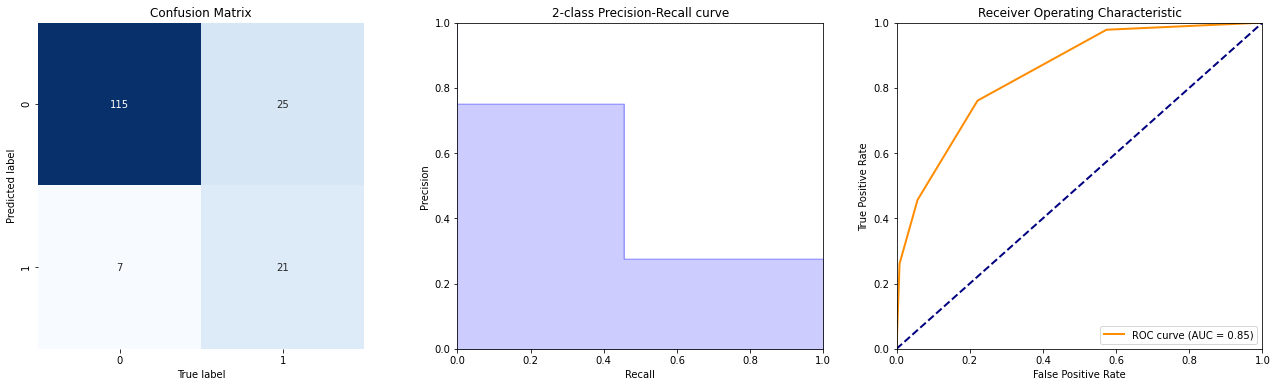

In [36]:
KNN_model.fit(X_train, y_train)
y_train_pred = KNN_model.predict(X_train)
y_train_prob = KNN_model.predict_proba(X_train)
y_test_pred = KNN_model.predict(X_test)
y_test_prob = KNN_model.predict_proba(X_test)
show_summary_report(y_train, y_train_pred, y_train_prob)

Accuracy : 0.7907 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.6667 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.5000 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7728                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


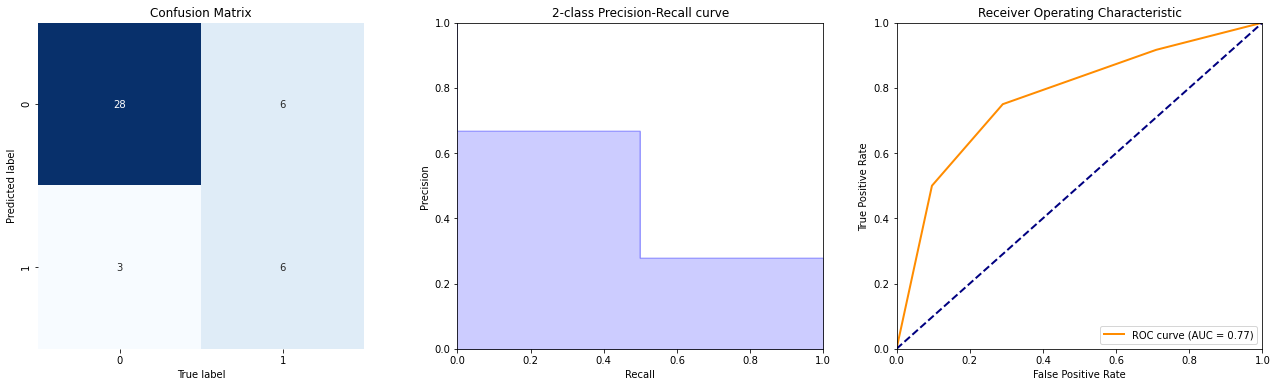

In [37]:
show_summary_report(y_test, y_test_pred,y_test_prob)

In [38]:
X.columns

Index(['Complementary', 'Age', 'Gender', 'Personality'], dtype='object')

In [39]:
model.feature_importances_

array([0.03675837, 0.48376242, 0.25409375, 0.1589599 , 0.0325438 ,
       0.03388175])

### Logistic regression

In [48]:
lrmodel = LogisticRegression()
print(lrmodel)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [49]:
lrmodel.fit(X_train, y_train)
y_train_pred = lrmodel.predict(X_train)
y_train_prob = lrmodel.predict_proba(X_train)
y_test_pred = lrmodel.predict(X_test)
y_test_prob = lrmodel.predict_proba(X_test)

Accuracy : 0.7679 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.6129 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.4130 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7783                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


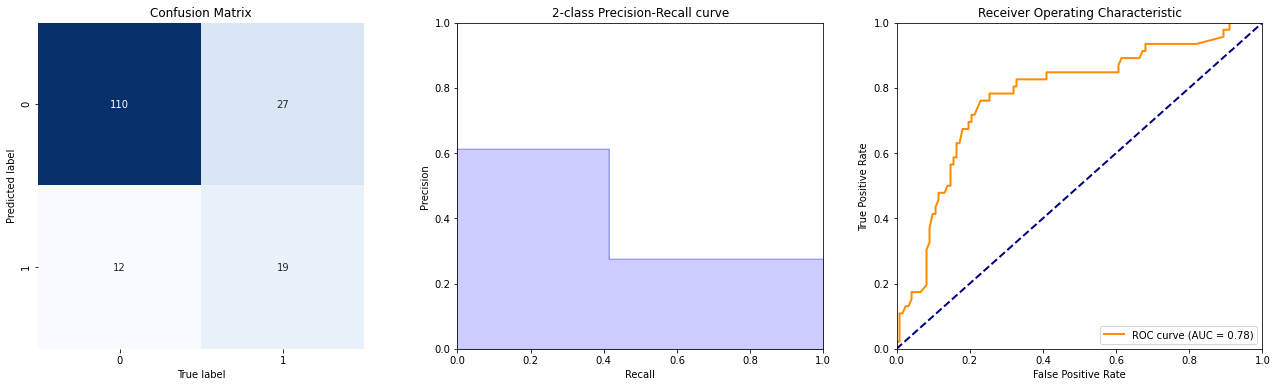

In [50]:
show_summary_report(y_train, y_train_pred, y_train_prob)

Accuracy : 0.7209 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.5000 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.1667 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8065                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


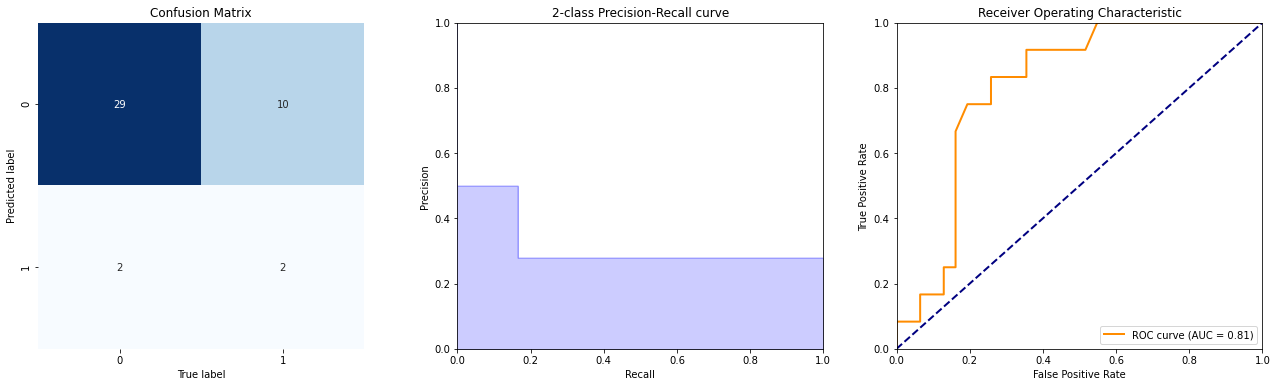

In [51]:
show_summary_report(y_test, y_test_pred,y_test_prob)

<b> Summary: </b> From the models run it seems KNN is the most promising methods of classifying these clients but it has bad recall. There are onlly a small sample of clients who have received EM intervention so possibly some better results will be found in the future when more data is available.

# Part 10. Conclusions & future directions
The analysis has been comprehensive and explored effectiveness of interventions through several methods. The data provides good evidence that the interventions used in the practice - both the standard talking therapies and the EM interventions - have a medium to strong effect on client outcomes and therefore should be continued. 

Further work needs to be done in the following areas:
* Routine data collection: truly longitudinal analyses requires routine data collection. At times data was missing or not collected routinely enough to allow for thorough longitudinal analysis. In particular little data was available for clients at the 4 to 6 month treatment point (n~10). The importance of routine data collection has been highlighted by this project.   
* More thorough measure of therapeutic relationship are needed. This emerged as a meaningful feature in the classification models but was only a binary data point. Standardised questionnaires are available for measuring therapeutic relationship. These should be adopted as a routine part of data collection. 
* Some of the classification models indicated that personality disorders or features might be useful elements of classification algorithms. Data for this feature was a simple binary number based on clinical retrospective judgement. More thorough data collection through personality assessment questionnaires could be conducted to see if this improves the quality of classification models.
* More work is needed on classifying those who undertake EM interventions. Classification models were not very good at this point. This could include a 12 month period of more focused data collection on factors like age, reason for seeking therapy, personality variables


In [54]:
# Reference
#https://www.youtube.com/watch?v=fXff4-_3Ey0
#https://stackoverflow.com/questions/25024797/max-and-min-date-in-pandas-groupby
#https://stackabuse.com/overview-of-classification-methods-in-python-with-scikit-learn/